#**Importing Libraries**

In [ ]:
# Import General Library
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
import altair as alt

from sklearn.preprocessing import RobustScaler

import warnings
warnings.filterwarnings(action="ignore")

plt.rcParams['figure.figsize'] = 8, 5
plt.style.use("fivethirtyeight")
pd.set_option('display.max_columns', None)

In [ ]:
# Connect and Access Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load and Read Dataset 
import io
data_train = pd.read_csv('/content/drive/MyDrive/dataset/application_train.csv')


In [ ]:
data_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [ ]:
# Load and Read Dataset 
import io
credit_card= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Database/fp/credit_card_balance.csv')
installments= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Database/fp/installments_payments.csv')
data_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Database/fp/application_train.csv')
prev = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Database/fp/previous_application.csv')
bureau = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Database/fp/bureau.csv')
bureau_balance = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Database/fp/bureau_balance.csv')
PoshCash = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Database/fp/POS_CASH_balance.csv')

In [ ]:
# Load and Read Dataset 
import io
credit_card= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Database/credit_card_balance.csv')
installments= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Database/installments_payments.csv')
data_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Database/application_train.csv')
prev = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Database/previous_application.csv')
bureau = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Database/bureau.csv')
bureau_balance = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Database/bureau_balance.csv')
PoshCash = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Database/POS_CASH_balance.csv')

#**Data Understanding - EDA**

##**Data Train**

### Feature Engineering 

**Flag Document**

Flag document di lakukan feature engineering untuk membuat kolom baru dan semua kolom flag document disatukan menjadi satu kolom

In [ ]:
# CREATE NEW COLUMN : FLAG_DOCS
list_col_new_flagDoc = [ 
    'FLAG_DOCUMENT_2',
    'FLAG_DOCUMENT_3',
    'FLAG_DOCUMENT_4',
    'FLAG_DOCUMENT_5',
    'FLAG_DOCUMENT_6',
    'FLAG_DOCUMENT_7',
    'FLAG_DOCUMENT_8',
    'FLAG_DOCUMENT_9',
    'FLAG_DOCUMENT_10',
    'FLAG_DOCUMENT_11',
    'FLAG_DOCUMENT_12',
    'FLAG_DOCUMENT_13',
    'FLAG_DOCUMENT_14',
    'FLAG_DOCUMENT_15',
    'FLAG_DOCUMENT_16',
    'FLAG_DOCUMENT_17',
    'FLAG_DOCUMENT_18',
    'FLAG_DOCUMENT_19',
    'FLAG_DOCUMENT_20',
    'FLAG_DOCUMENT_21']

In [ ]:
def create_sum_cols(df,ls_cols,newcol):
    df[newcol] = np.nan
    ls_sum_value = df[ls_cols].sum(axis=1)
    df[newcol] = ls_sum_value
    return df

In [ ]:
# Create kolom baru dengan nama kolom FLAG_DOCS
create_sum_cols(data_train,list_col_new_flagDoc,'FLAG_DOCS');

In [ ]:
data_train[['FLAG_DOCS']].head()

,FLAG_DOCS
0,1
1,1
2,0
3,1
4,1


**Flag Addr**

In [ ]:
# CREATE NEW COLUMN : FLAG_ADDR
list_col_new_flagAddr = ['REG_REGION_NOT_LIVE_REGION','LIVE_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY','LIVE_CITY_NOT_WORK_CITY']

In [ ]:
create_sum_cols(data_train,list_col_new_flagAddr,'FLAG_ADDR');

In [ ]:
data_train[['FLAG_ADDR']].head()

,FLAG_ADDR
0,0
1,0
2,0
3,0
4,1


**Flag Asset**

In [ ]:
# CREATE NEW COLUMN : 0 - none, 1 - with car no realty, 2 - no car with realty, 3 - with car with realty
list_col_new_asset = ['FLAG_OWN_CAR','FLAG_OWN_REALTY'] 

In [ ]:
def create_asset(df):
    df['FLAG_ASSET'] = np.nan
    filter_0 = (df.FLAG_OWN_CAR=='N')&(df.FLAG_OWN_REALTY=='N')
    filter_1 = (df.FLAG_OWN_CAR=='Y')&(df.FLAG_OWN_REALTY=='N')
    filter_2 = (df.FLAG_OWN_CAR=='N')&(df.FLAG_OWN_REALTY=='Y')
    filter_3 = (df.FLAG_OWN_CAR=='Y')&(df.FLAG_OWN_REALTY=='Y')
    
    df['FLAG_ASSET'][filter_0] = 0
    df['FLAG_ASSET'][filter_1] = 1
    df['FLAG_ASSET'][filter_2] = 2
    df['FLAG_ASSET'][filter_3] = 3
    return df

    
create_asset(data_train);

In [ ]:
data_train[['FLAG_OWN_CAR','FLAG_OWN_REALTY','FLAG_ASSET']].head()

,FLAG_OWN_CAR,FLAG_OWN_REALTY,FLAG_ASSET
0,N,Y,2.0
1,N,N,0.0
2,Y,Y,3.0
3,N,Y,2.0
4,N,Y,2.0


In [ ]:
# Display Train Dataset
data_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [ ]:
# Display Dimensions of Train Dataset
data_train.shape

(307511, 122)

Inisght: dimensi dari data_train yaitu (307511, 122)

###**Feature Selection**

In [ ]:
# Chosen Features (30 highest f-score) of Train Dataset
chosen_feats = ['SK_ID_CURR','TARGET', 'EXT_SOURCE_2','EXT_SOURCE_3','EXT_SOURCE_1','DAYS_BIRTH','REGION_RATING_CLIENT_W_CITY','REGION_RATING_CLIENT',
               'NAME_EDUCATION_TYPE','CODE_GENDER','REG_CITY_NOT_WORK_CITY','DAYS_EMPLOYED',
               'NAME_INCOME_TYPE','FLAG_EMP_PHONE','REG_CITY_NOT_LIVE_CITY','FLAG_DOCUMENT_3','DAYS_REGISTRATION',
               'REGION_POPULATION_RELATIVE','ELEVATORS_AVG',
               'ELEVATORS_MEDI','NAME_HOUSING_TYPE','ELEVATORS_MODE','LIVE_CITY_NOT_WORK_CITY','DEF_60_CNT_SOCIAL_CIRCLE',
               'NAME_CONTRACT_TYPE','AMT_CREDIT','TOTALAREA_MODE','AMT_INCOME_TOTAL']

In [ ]:
df = ['SK_ID_CURR','TARGET', 'EXT_SOURCE_2','EXT_SOURCE_3','EXT_SOURCE_1','DAYS_BIRTH','REGION_RATING_CLIENT_W_CITY','REGION_RATING_CLIENT',
               'REG_CITY_NOT_WORK_CITY']
# Define Features based on Selected Features
df = pd.DataFrame(data_train,columns=df)

In [ ]:
# Define Variable for Merge Dataset (Train and Bureau Dataset)
df = pd.merge(left = feature_final, right = df, how = 'left', left_on = 'SK_ID_CURR', right_on = 'SK_ID_CURR')
df.shape

(307511, 40)

In [ ]:
# Define Features based on Selected Features
feature_train = pd.DataFrame(data_train,columns=chosen_feats)

In [ ]:
data_train['Unnamed: 0'] = feature_final['SK_ID_CURR']

In [ ]:
data_train = data_train.drop(['Unnamed: 16','Unnamed: 17','Unnamed: 18','Unnamed: 19',
                'Unnamed: 20','Unnamed: 21','Unnamed: 22','Unnamed: 23','Unnamed: 24',
                'Unnamed: 25','Unnamed: 26'], axis=1)

In [ ]:
# Cek missing value 
data_train.isnull().sum()

SK_ID_CURR                        0
REGION_POPULATION_RELATIVE        0
CNT_FAM_MEMBERS                   0
REGION_RATING_CLIENT              0
ORGANIZATION_TYPE                 0
FLAG_ASSET                     1021
FLAG_CONTACTS                  1021
FLAG_DOCS                      1021
FLAG_ADDR                      1021
YEARS_EMPLOYED                 2100
INCOME_BAND                   41509
PERCENT_ANNUITY_INCOME        41509
PERCENT_CREDIT_INCOME         41509
EXP_CAR                       41509
EXP_HOUSE                     41509
dtype: int64

In [ ]:
# Define New Features with Value of Past Features
feature_final2['EXT_SOURCE_1'] = feature_train['EXT_SOURCE_1']
feature_final2['TOTALAREA_MODE'] = feature_train['TOTALAREA_MODE']

In [ ]:
# Display Train Dataset
feature_train.head()

,SK_ID_CURR,TARGET,EXT_SOURCE_2,EXT_SOURCE_3,EXT_SOURCE_1,DAYS_BIRTH,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,NAME_EDUCATION_TYPE,CODE_GENDER,REG_CITY_NOT_WORK_CITY,DAYS_EMPLOYED,NAME_INCOME_TYPE,FLAG_EMP_PHONE,REG_CITY_NOT_LIVE_CITY,FLAG_DOCUMENT_3,DAYS_REGISTRATION,REGION_POPULATION_RELATIVE,ELEVATORS_AVG,ELEVATORS_MEDI,NAME_HOUSING_TYPE,ELEVATORS_MODE,LIVE_CITY_NOT_WORK_CITY,DEF_60_CNT_SOCIAL_CIRCLE,NAME_CONTRACT_TYPE,AMT_CREDIT,TOTALAREA_MODE,AMT_INCOME_TOTAL
0,100002,1,0.262949,0.139376,0.083037,-9461,2,2,Secondary / secondary special,M,0,-637,Working,1,0,1,-3648.0,0.018801,0.00,0.00,House / apartment,0.0000,0,2.0,Cash loans,406597.5,0.0149,202500.0
1,100003,0,0.622246,NaN,0.311267,-16765,1,1,Higher education,F,0,-1188,State servant,1,0,1,-1186.0,0.003541,0.08,0.08,House / apartment,0.0806,0,0.0,Cash loans,1293502.5,0.0714,270000.0
2,100004,0,0.555912,0.729567,NaN,-19046,2,2,Secondary / secondary special,M,0,-225,Working,1,0,0,-4260.0,0.010032,NaN,NaN,House / apartment,NaN,0,0.0,Revolving loans,135000.0,NaN,67500.0
3,100006,0,0.650442,NaN,NaN,-19005,2,2,Secondary / secondary special,F,0,-3039,Working,1,0,1,-9833.0,0.008019,NaN,NaN,House / apartment,NaN,0,0.0,Cash loans,312682.5,NaN,135000.0
4,100007,0,0.322738,NaN,NaN,-19932,2,2,Secondary / secondary special,M,1,-3038,Working,1,0,0,-4311.0,0.028663,NaN,NaN,House / apartment,NaN,1,0.0,Cash loans,513000.0,NaN,121500.0


In [ ]:
# Define Variable from Missing Value Feature
train_miss_med = ['EXT_SOURCE_2', 'EXT_SOURCE_3',	'EXT_SOURCE_1', 'ELEVATORS_AVG'	,'ELEVATORS_MEDI','ELEVATORS_MODE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'TOTALAREA_MODE']

In [ ]:
# Handling Missing Values with Median
for col in train_miss_med:
    feature_train[col].fillna(feature_train[col].median(),inplace=True)

In [ ]:
# Check Null Value of Train Dataset
feature_train.isnull().sum()

SK_ID_CURR                     0
TARGET                         0
EXT_SOURCE_2                   0
EXT_SOURCE_3                   0
EXT_SOURCE_1                   0
DAYS_BIRTH                     0
REGION_RATING_CLIENT_W_CITY    0
REGION_RATING_CLIENT           0
NAME_EDUCATION_TYPE            0
CODE_GENDER                    0
REG_CITY_NOT_WORK_CITY         0
DAYS_EMPLOYED                  0
NAME_INCOME_TYPE               0
FLAG_EMP_PHONE                 0
REG_CITY_NOT_LIVE_CITY         0
FLAG_DOCUMENT_3                0
DAYS_REGISTRATION              0
REGION_POPULATION_RELATIVE     0
ELEVATORS_AVG                  0
ELEVATORS_MEDI                 0
NAME_HOUSING_TYPE              0
ELEVATORS_MODE                 0
LIVE_CITY_NOT_WORK_CITY        0
DEF_60_CNT_SOCIAL_CIRCLE       0
NAME_CONTRACT_TYPE             0
AMT_CREDIT                     0
TOTALAREA_MODE                 0
AMT_INCOME_TOTAL               0
dtype: int64

In [ ]:
# Check Duplicate Value of Train Dataset
feature_train.duplicated().sum()

0

In [ ]:
# Check Correlation Features of Train Dataset
feature_train.corr()

,SK_ID_CURR,TARGET,EXT_SOURCE_2,EXT_SOURCE_3,EXT_SOURCE_1,DAYS_BIRTH,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,REG_CITY_NOT_WORK_CITY,DAYS_EMPLOYED,FLAG_EMP_PHONE,REG_CITY_NOT_LIVE_CITY,FLAG_DOCUMENT_3,DAYS_REGISTRATION,REGION_POPULATION_RELATIVE,ELEVATORS_AVG,ELEVATORS_MEDI,ELEVATORS_MODE,LIVE_CITY_NOT_WORK_CITY,DEF_60_CNT_SOCIAL_CIRCLE,AMT_CREDIT,TOTALAREA_MODE,AMT_INCOME_TOTAL
SK_ID_CURR,1.000000,-0.002108,0.002319,0.000184,0.000060,-0.001500,-0.001138,-0.001075,-0.001582,0.001366,-0.001337,-0.001885,-0.003411,-0.000973,0.000849,0.003612,0.003742,0.003711,0.000067,0.001182,-0.000343,0.001861,-0.001820
TARGET,-0.002108,1.000000,-0.160295,-0.155892,-0.098887,0.078239,0.060893,0.058899,0.050994,-0.044932,0.045982,0.044395,0.044346,0.041975,-0.037227,-0.035853,-0.035552,-0.034220,0.032518,0.031401,-0.030369,-0.030214,-0.003982
EXT_SOURCE_2,0.002319,-0.160295,1.000000,0.094147,0.134993,-0.091947,-0.288013,-0.292621,-0.075868,-0.020652,0.019346,-0.043222,-0.030664,-0.059924,0.198725,0.118258,0.116984,0.111612,-0.058823,-0.032481,0.130930,0.091452,0.060855
EXT_SOURCE_3,0.000184,-0.155892,0.094147,1.000000,0.109100,-0.178527,-0.011342,-0.011724,-0.069288,0.101525,-0.103098,-0.067246,-0.028274,-0.096033,-0.004507,0.008321,0.008303,0.008023,-0.038631,-0.030652,0.036640,0.006166,-0.030737
EXT_SOURCE_1,0.000060,-0.098887,0.134993,0.109100,1.000000,-0.362185,-0.077968,-0.078013,-0.126564,0.149234,-0.151509,-0.100070,-0.029469,-0.111284,0.066912,0.056834,0.056030,0.053604,-0.080196,-0.020124,0.113983,0.046144,0.024389
DAYS_BIRTH,-0.001500,0.078239,-0.091947,-0.178527,-0.362185,1.000000,0.008073,0.009361,0.242401,-0.615864,0.619888,0.180382,0.109666,0.331912,-0.029582,-0.008773,-0.008613,-0.008158,0.158882,0.001861,-0.055436,-0.003221,0.027261
REGION_RATING_CLIENT_W_CITY,-0.001138,0.060893,-0.288013,-0.011342,-0.077968,0.008073,1.000000,0.950842,0.028081,0.034624,-0.034712,0.045669,0.067083,0.074038,-0.531535,-0.220915,-0.217124,-0.203495,-0.002805,0.017371,-0.110915,-0.166787,-0.091735
REGION_RATING_CLIENT,-0.001075,0.058899,-0.292621,-0.011724,-0.078013,0.009361,0.950842,1.000000,0.008360,0.032750,-0.032871,0.035741,0.062528,0.080210,-0.532877,-0.203345,-0.199483,-0.185423,-0.019154,0.018230,-0.101776,-0.149428,-0.085465
REG_CITY_NOT_WORK_CITY,-0.001582,0.050994,-0.075868,-0.069288,-0.126564,0.242401,0.028081,0.008360,1.000000,-0.254559,0.256427,0.440409,0.056275,0.099874,-0.044057,-0.139462,-0.137908,-0.133160,0.825575,0.001993,-0.018856,-0.105969,0.006431
DAYS_EMPLOYED,0.001366,-0.044932,-0.020652,0.101525,0.149234,-0.615864,0.034624,0.032750,-0.254559,1.000000,-0.999755,-0.090516,-0.249082,-0.210242,-0.003980,-0.010248,-0.010238,-0.009524,-0.218101,0.014215,-0.066838,-0.012963,-0.064223


In [ ]:
# Sorts the Correlation Values of All Selected Features by TARGET
pd.set_option('display.max_rows', None)
feature_train.corr()['TARGET'].sort_values(ascending=False).abs()

TARGET                         1.000000
DAYS_BIRTH                     0.078239
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
REG_CITY_NOT_WORK_CITY         0.050994
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_DOCUMENT_3                0.044346
DAYS_REGISTRATION              0.041975
LIVE_CITY_NOT_WORK_CITY        0.032518
DEF_60_CNT_SOCIAL_CIRCLE       0.031401
SK_ID_CURR                     0.002108
AMT_INCOME_TOTAL               0.003982
TOTALAREA_MODE                 0.030214
AMT_CREDIT                     0.030369
ELEVATORS_MODE                 0.034220
ELEVATORS_MEDI                 0.035552
ELEVATORS_AVG                  0.035853
REGION_POPULATION_RELATIVE     0.037227
DAYS_EMPLOYED                  0.044932
EXT_SOURCE_1                   0.098887
EXT_SOURCE_3                   0.155892
EXT_SOURCE_2                   0.160295
Name: TARGET, dtype: float64

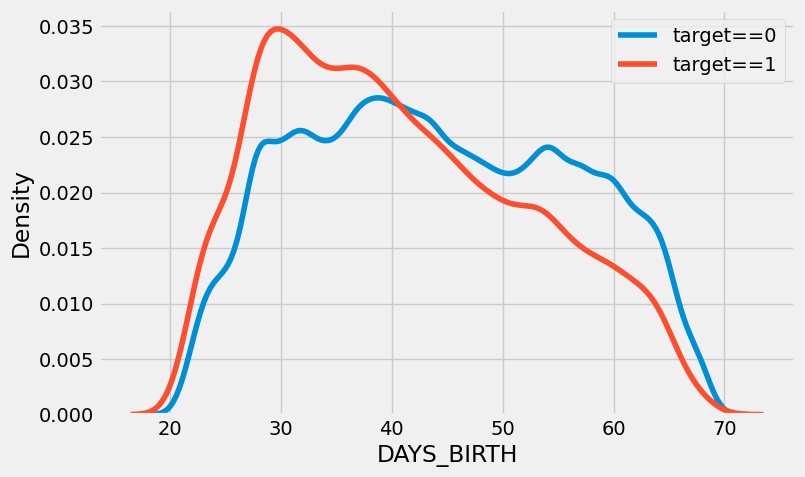

In [ ]:
# Visualization of Distribution Numeric Features : DAYS_BIRTH
sns.kdeplot(feature_train[feature_train['TARGET']==0].loc[:,'DAYS_BIRTH'].abs()/365,label='target==0')
sns.kdeplot(feature_train[feature_train['TARGET']==1].loc[:,'DAYS_BIRTH'].abs()/365,label='target==1')
plt.legend()

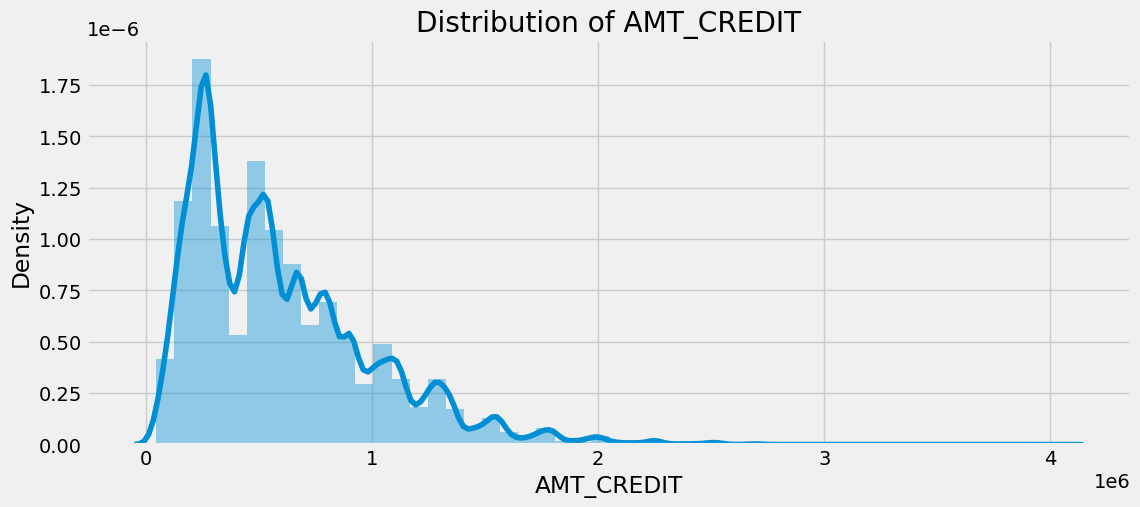

In [ ]:
# Check Distribution Feature : AMT_CREDIT
plt.figure(figsize=(12,5))
plt.title("Distribution of AMT_CREDIT")
ax = sns.distplot(feature_train["AMT_CREDIT"])

Dapat kita lihat bahwa data tidak seimbang, akan tetapi dari data tersebut Loan Repayed lebih besar dibandingkan dengan orang yang tidak sanggup bayar

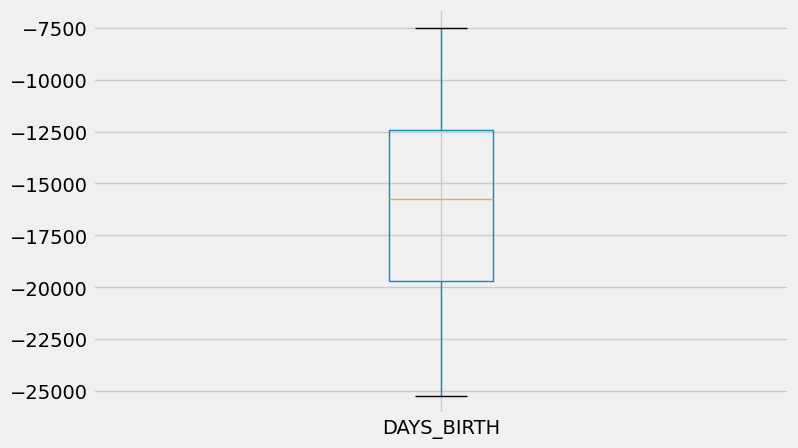

In [ ]:
# Check Outlier Feature using Boxplot : DAYS_BIRTH
feature_train[['DAYS_BIRTH']].boxplot() 
plt.show()

In [ ]:
# Display Train Dataset
feature_train.head()

,SK_ID_CURR,TARGET,EXT_SOURCE_2,EXT_SOURCE_3,EXT_SOURCE_1,DAYS_BIRTH,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,NAME_EDUCATION_TYPE,CODE_GENDER,REG_CITY_NOT_WORK_CITY,DAYS_EMPLOYED,NAME_INCOME_TYPE,FLAG_EMP_PHONE,REG_CITY_NOT_LIVE_CITY,FLAG_DOCUMENT_3,DAYS_REGISTRATION,REGION_POPULATION_RELATIVE,ELEVATORS_AVG,ELEVATORS_MEDI,NAME_HOUSING_TYPE,ELEVATORS_MODE,LIVE_CITY_NOT_WORK_CITY,DEF_60_CNT_SOCIAL_CIRCLE,NAME_CONTRACT_TYPE,AMT_CREDIT,TOTALAREA_MODE,AMT_INCOME_TOTAL
0,100002,1,0.262949,0.139376,0.083037,-9461,2,2,Secondary / secondary special,M,0,-637,Working,1,0,1,-3648.0,0.018801,0.00,0.00,House / apartment,0.0000,0,2.0,Cash loans,406597.5,0.0149,202500.0
1,100003,0,0.622246,0.535276,0.311267,-16765,1,1,Higher education,F,0,-1188,State servant,1,0,1,-1186.0,0.003541,0.08,0.08,House / apartment,0.0806,0,0.0,Cash loans,1293502.5,0.0714,270000.0
2,100004,0,0.555912,0.729567,0.505998,-19046,2,2,Secondary / secondary special,M,0,-225,Working,1,0,0,-4260.0,0.010032,0.00,0.00,House / apartment,0.0000,0,0.0,Revolving loans,135000.0,0.0688,67500.0
3,100006,0,0.650442,0.535276,0.505998,-19005,2,2,Secondary / secondary special,F,0,-3039,Working,1,0,1,-9833.0,0.008019,0.00,0.00,House / apartment,0.0000,0,0.0,Cash loans,312682.5,0.0688,135000.0
4,100007,0,0.322738,0.535276,0.505998,-19932,2,2,Secondary / secondary special,M,1,-3038,Working,1,0,0,-4311.0,0.028663,0.00,0.00,House / apartment,0.0000,1,0.0,Cash loans,513000.0,0.0688,121500.0


###**Description of the Selected Features List**

> **EXT_SOURCE_2, EXT_SOURCE_3, EXT_SOURCE_1:**Tiga fitur ini adalah nilai-nilai rata-rata normalisasi dari beberapa sumber eksternal seperti data kredit dari institusi keuangan lain. Fitur-fitur ini memiliki korelasi yang cukup tinggi dengan kemampuan membayar kembali pinjaman dan digunakan untuk menilai risiko kredit pelamar.

> **DAYS_BIRTH:** Fitur ini mengindikasikan umur pelamar dalam satuan hari. Fitur ini mungkin relevan karena umumnya semakin tua usia seseorang, semakin sedikit risiko kredit yang mereka miliki.

> **REGION_RATING_CLIENT_W_CITY, REGION_RATING_CLIENT:** Fitur-fitur ini mengindikasikan peringkat kualitas kehidupan di wilayah pelamar berdasarkan kategori seperti risiko kriminalitas, kemacetan lalu lintas, atau fasilitas kesehatan. Kategori ini dapat mempengaruhi kemampuan pelamar untuk membayar kembali pinjaman.

> **NAME_EDUCATION_TYPE:** Fitur ini mengindikasikan tingkat pendidikan pelamar seperti SMA, Diploma, Sarjana, dsb. Kategori ini dapat mempengaruhi kemampuan pelamar untuk membayar kembali pinjaman.

> **CODE_GENDER:** Fitur ini mengindikasikan jenis kelamin pelamar. Jenis kelamin dapat mempengaruhi kemampuan pelamar untuk membayar kembali pinjaman.

> **REG_CITY_NOT_WORK_CITY:** Fitur ini mengindikasikan apakah kota tempat tinggal pelamar berbeda dengan kota tempat kerja. Hal ini mungkin relevan karena dapat memberikan indikasi mengenai stabilitas kehidupan pelamar.

> **DAYS_EMPLOYED:** Fitur ini mengindikasikan jumlah hari sejak pelamar mulai bekerja. Hal ini mungkin relevan karena semakin lama masa kerja pelamar, semakin stabil posisi kerja dan penghasilan mereka.

> **NAME_INCOME_TYPE:** Fitur ini mengindikasikan jenis pendapatan pelamar seperti karyawan, wiraswasta, pensiunan, dsb. Kategori ini dapat mempengaruhi kemampuan pelamar untuk membayar kembali pinjaman.

> **FLAG_EMP_PHONE:** Fitur ini mengindikasikan apakah pelamar memiliki telepon yang terdaftar di kantor mereka. Hal ini mungkin relevan karena dapat memberikan indikasi mengenai stabilitas pekerjaan pelamar.

> **REG_CITY_NOT_LIVE_CITY:** Fitur ini mengindikasikan apakah kota tempat tinggal pelamar berbeda dengan kota di mana mereka terdaftar sebagai warga negara. Hal ini mungkin relevan karena dapat memberikan indikasi mengenai stabilitas kehidupan pelamar.

> **FLAG_DOCUMENT_3:** Fitur ini mengindikasikan apakah pelamar memiliki dokumen tertentu seperti paspor atau SIM. Hal ini mungkin relevan karena dapat memberikan indikasi mengenai stabilitas kehidupan pelamar.

> **DAYS_REGISTRATION:** Fitur ini menunjukkan jumlah hari sejak pelanggan terdaftar di basis data klien bank. Nilai yang lebih besar menunjukkan pelanggan baru-baru ini bergabung dengan bank dan nilai yang lebih kecil menunjukkan pelanggan yang telah lama bergabung. Fitur ini dapat memberikan informasi tentang seberapa loyal pelanggan terhadap bank dan seberapa sering mereka mengajukan pinjaman atau menggunakan produk perbankan lainnya.

> **AMT_INCOME_TOTAL:** Fitur ini menunjukkan pendapatan pelamar secara keseluruhan. Kategori ini dapat mempengaruhi kemampuan pelamar untuk membayar kembali pinjaman.

### **Insight**

##**Bureau**

DataFrame ini digunakan untuk merekam riwayat kredit seorang pelanggan pada lembaga kredit yang berbeda. Kolom SK_ID_CURR dan SK_ID_BUREAU digunakan untuk menghubungkan riwayat kredit dari pelanggan yang sama pada lembaga kredit yang berbeda. Kolom lainnya merekam informasi penting seperti status kredit, jumlah hutang, jumlah angsuran, dan keterlambatan pembayaran pada setiap kredit pada lembaga kredit yang berbeda.

In [ ]:
# Display Dimensions of Bureau Dataset
bureau.shape

(1716428, 17)

In [ ]:
# Displays the Number of Duplicate Data based on SK_ID_CURR
print(bureau.duplicated(subset='SK_ID_CURR').sum())

1410617


In [ ]:
# Drop Duplicated Data based on SK_ID_CURR
bureau = bureau.drop_duplicates(subset='SK_ID_CURR',  keep='first')

In [ ]:
# Check Duplicated Data based on SK_ID_CURR
bureau.duplicated(subset='SK_ID_CURR').sum()

0

In [ ]:
# Check Null Value of Bureau Dataset
bureau.isnull().sum()

SK_ID_CURR                     0
SK_ID_BUREAU                   0
CREDIT_ACTIVE                  0
CREDIT_CURRENCY                0
DAYS_CREDIT                    0
CREDIT_DAY_OVERDUE             0
DAYS_CREDIT_ENDDATE         8244
DAYS_ENDDATE_FACT          98124
AMT_CREDIT_MAX_OVERDUE    237375
CNT_CREDIT_PROLONG             0
AMT_CREDIT_SUM                 4
AMT_CREDIT_SUM_DEBT        24835
AMT_CREDIT_SUM_LIMIT       86033
AMT_CREDIT_SUM_OVERDUE         0
CREDIT_TYPE                    0
DAYS_CREDIT_UPDATE             0
AMT_ANNUITY               224722
dtype: int64

### **Feature Selection**

In [ ]:
# Define Selected Feature of Bureau Dataset 
fitur_bureau = bureau[['SK_ID_CURR', 'SK_ID_BUREAU', 'AMT_CREDIT_MAX_OVERDUE', 'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT']]

In [ ]:
# Check Null Values of Selected Feature Bureau Dataset
fitur_bureau.isnull().sum()

SK_ID_CURR                     0
SK_ID_BUREAU                   0
AMT_CREDIT_MAX_OVERDUE    237375
AMT_CREDIT_SUM                 4
AMT_CREDIT_SUM_DEBT        24835
dtype: int64

In [ ]:
# Handling Missing Values with Median
bureau_miss_med = ['AMT_CREDIT_MAX_OVERDUE', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM']
for col in bureau_miss_med:
    fitur_bureau[col].fillna(fitur_bureau[col].median(),inplace=True)

In [ ]:
# Check Duplicated Data based on SK_ID_CURR
fitur_bureau.duplicated(subset='SK_ID_CURR').sum()

0

In [ ]:
# Define Variable for Merge Dataset (Train and Bureau Dataset)
df1 = pd.merge(left = feature_train, right = fitur_bureau, how = 'left', left_on = 'SK_ID_CURR', right_on = 'SK_ID_CURR')
df1.shape

(307511, 32)

In [ ]:
# Display Dimensions of Bureau Dataset
fitur_bureau.shape

(305811, 5)

In [ ]:
# Check Null Values of Results Merge Data
df1.isnull().sum()

SK_ID_CURR                          0
TARGET                              0
EXT_SOURCE_2                      660
EXT_SOURCE_3                    60965
EXT_SOURCE_1                   173378
DAYS_BIRTH                          0
REGION_RATING_CLIENT_W_CITY         0
REGION_RATING_CLIENT                0
NAME_EDUCATION_TYPE                 0
CODE_GENDER                         0
REG_CITY_NOT_WORK_CITY              0
DAYS_EMPLOYED                       0
NAME_INCOME_TYPE                    0
FLAG_EMP_PHONE                      0
REG_CITY_NOT_LIVE_CITY              0
FLAG_DOCUMENT_3                     0
DAYS_REGISTRATION                   0
REGION_POPULATION_RELATIVE          0
ELEVATORS_AVG                  163891
ELEVATORS_MEDI                 163891
NAME_HOUSING_TYPE                   0
ELEVATORS_MODE                 163891
LIVE_CITY_NOT_WORK_CITY             0
DEF_60_CNT_SOCIAL_CIRCLE         1021
NAME_CONTRACT_TYPE                  0
AMT_CREDIT                          0
TOTALAREA_MO

###**Description of the Selected Features List**

> **CREDIT_ACTIVE**: Status kredit pada lembaga kredit yang berbeda, apakah masih aktif, telah dilunasi, atau telah ditutup. -> *Fitur Terpilih*

> **DAYS_CREDIT:** Jumlah hari sejak kredit tersebut diterbitkan pada lembaga kredit yang berbeda.

> **CREDIT_DAY_OVERDUE:** Jumlah hari keterlambatan pembayaran pada kredit tersebut. -> *Fitur Terpilih*

> **DAYS_CREDIT_ENDDATE:** Jumlah hari sejak tanggal berakhirnya kredit pada lembaga kredit yang berbeda.

> **DAYS_ENDDATE_FACT:** Jumlah hari sejak tanggal sebenarnya kredit tersebut dilunasi.

> **AMT_CREDIT_MAX_OVERDUE:** Jumlah maksimum tunggakan pembayaran pada kredit tersebut. -> *Fitur Terpilih*

> **CNT_CREDIT_PROLONG:**Jumlah kali perpanjangan kredit pada lembaga kredit yang berbeda. -> *Fitur Terpilih*

> **AMT_CREDIT_SUM:** Jumlah total kredit pada lembaga kredit yang berbeda. -> *Fitur Terpilih*

> **AMT_CREDIT_SUM_DEBT:** Jumlah total hutang yang harus dibayar pada kredit tersebut.-> *Fitur Terpilih*

> **AMT_CREDIT_SUM_LIMIT:** Batas kredit yang disetujui pada kredit tersebut.

> **AMT_CREDIT_SUM_OVERDUE:** Jumlah tunggakan pembayaran pada kredit tersebut.

> **CREDIT_TYPE:** Jenis kredit pada lembaga kredit yang berbeda, seperti kredit konsumen, hipotek, atau kredit usaha.

> **DAYS_CREDIT_UPDATE:** Jumlah hari sejak kredit tersebut terakhir diubah pada lembaga kredit yang berbeda.

> **AMT_ANNUITY:** Jumlah angsuran bulanan yang harus dibayar pada kredit tersebut. 

### **Insight**

Dataset Bureau merupakan dataset yang berisi semua kredit klien sebelumnya yang diberikan oleh lembaga keuangan lain yang dilaporkan ke Biro Kredit (untuk klien yang memiliki pinjaman). Dataset ini terdiri dari 1716428 baris dengan 16 kolom dan tidak memiliki data duplicate tetapi memiliki banyak data null value pada beberapa fitur seperti DAYS_CREDIT_ENDDATE, DAYS_ENDDATE_FACT, AMT_CREDIT_MAX_OVERDUE, AMT_CREDIT_SUM, AMT_CREDIT_SUM_DEBT, AMT_CREDIT_SUM_LIMIT. Dataset ini juga dilakukan drop fitur yang tidak memiliki korelasi sebanyak 1 fitur (AMT_ANNUITY) sehingga jumlah kolom yang tersisa pada dataset ada 16 kolom dengan jumlah data yang sama. 

##**Bureau Balance**



In [ ]:
# Display Bureau Balance Dataset
bureau_balance.head()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


In [ ]:
# Display Dimensions of Bureau Balance Dataset
bureau_balance.shape

(27299925, 3)

In [ ]:
# Check Information of Bureau Balance Dataset
bureau_balance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 3 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   SK_ID_BUREAU    int64 
 1   MONTHS_BALANCE  int64 
 2   STATUS          object
dtypes: int64(2), object(1)
memory usage: 624.8+ MB


In [ ]:
# Check Null Values of Bureau Balance Dataset
bureau_balance.isnull().sum()

SK_ID_BUREAU      0
MONTHS_BALANCE    0
STATUS            0
dtype: int64

### **Feature Selection**

In [ ]:
# Chosen Feature of Bureau Balance Dataset
fitur_bureau_balance = bureau_balance[['SK_ID_BUREAU','MONTHS_BALANCE']]
fitur_bureau_balance.shape

(27299925, 2)

In [ ]:
# Define Variable for Drop Duplicate Data based on SK_ID_BUREAU
fitur_bureau_balance = fitur_bureau_balance.drop_duplicates(subset=['SK_ID_BUREAU'], keep='first')

In [ ]:
# Check Duplicate Data of Selected Feature
fitur_bureau_balance.duplicated().sum()

0

In [ ]:
# Define Variable for Merge Dataset (df1 and Bureau Balance Dataset)
df2 = pd.merge(left = df1, right = bureau_balance , how = 'left', left_on = 'SK_ID_BUREAU', right_on = 'SK_ID_BUREAU')
df2.shape

(2943804, 34)

In [ ]:
# Define Variable for Merge Dataset (df2 and Train Dataset)
df2 = pd.merge(df2, feature_train, on='SK_ID_CURR')

In [ ]:
# Display Dimensions of Results Data Merge (Train, Bureau, and Bureau Balance Dataset)
df2.shape

(92199, 60)

###**Description of the Selected Features List**

> **SK_ID_BUREAU:** ID RECODED dari kredit Biro Kredit (pengkodean unik untuk setiap aplikasi) 

> **MONTHS_BALANCE:** Bulan saldo relatif terhadap tanggal aplikasi (-1 berarti tanggal saldo paling segar)

### **Insight**

Dataset Bureau Balance merupakan Saldo bulanan kredit sebelumnya di Biro Kredit yang mana Tabel ini memiliki satu baris untuk setiap bulan riwayat dari setiap kredit sebelumnya yang dilaporkan ke Biro Kredit. Dataset ini terdiri dari 27299925 baris dengan 3 kolom dan tidak memiliki data duplicate serta tidak memiliki data null value pada fiturnya. Dataset ini juga dilakukan tidak dilakukan drop fitur sehingga jumlah data dan kolom yang tersisa pada dataset tetap utuh.  

##**POS CASH**


Dataset PoshCash merupakan dataset yang berisi Riwayat pembayaran untuk kredit yang dicairkan sebelumnya di Home Credit terkait dengan pinjaman yang mana ada satu baris untuk setiap pembayaran yang dilakukan ditambah dan masing-masing satu baris untuk pembayaran yang terlewatkan. Dataset ini terdiri dari 13605401 baris dengan 8 kolom dan tidak memiliki data duplicate tetapi memiliki banyak data null value pada beberapa fitur seperti DAYS_ENTRY_PAYMENT dan AMT_PAYMENT. Dataset ini tidak dilakukan drop fitur sehingga jumlah data dan kolom yang tersisa masih utuh

In [ ]:
# Display Pos Cash Dataset
PoshCash.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


In [ ]:
# Filter Data by the Desired Contract Statuses
active_completed = PoshCash[PoshCash['NAME_CONTRACT_STATUS'].isin(['Active', 'Completed'])]['SK_ID_CURR'].nunique()
active = PoshCash[PoshCash['NAME_CONTRACT_STATUS'] == 'Active']['SK_ID_CURR'].nunique()
active_and_completed = PoshCash[PoshCash['NAME_CONTRACT_STATUS'].isin(['Active', 'Completed']) & (~PoshCash['NAME_CONTRACT_STATUS'].isin(['Signed']))]['SK_ID_CURR'].nunique()
active_signed = PoshCash[PoshCash['NAME_CONTRACT_STATUS'].isin(['Active', 'Signed'])]['SK_ID_CURR'].nunique()

# Print the Result
print(f"Jumlah SK_ID_CURR untuk [Active, Completed]: {active_completed}")
print(f"Jumlah SK_ID_CURR untuk [Active]: {active}")
print(f"Jumlah SK_ID_CURR untuk [Active, Completed] tanpa [Signed]: {active_and_completed}")
print(f"Jumlah SK_ID_CURR untuk [Active, Signed]: {active_signed}")

Jumlah SK_ID_CURR untuk [Active, Completed]: 337208
Jumlah SK_ID_CURR untuk [Active]: 337034
Jumlah SK_ID_CURR untuk [Active, Completed] tanpa [Signed]: 337208
Jumlah SK_ID_CURR untuk [Active, Signed]: 337077


Dari data ini, terdapat jumlah pelanggan yang masih aktif dan Signed ( status kontrak yang telah ditandatangani oleh peminjam dan lembaga keuangan yang memberikan kredit) sehingga ini dapat menjadi pertimbangan untuk perusahaan dalam memberi pinjaman ke masing-masing individu.

### **Feature Selection**

In [ ]:
# Chosen Feature of Pos Cash Dataset
fitur_poshcash = PoshCash[['SK_ID_PREV'	,'SK_ID_CURR', 'NAME_CONTRACT_STATUS', 'SK_DPD_DEF', 'SK_DPD']]

In [ ]:
# Check Null Values of Selected Feature Pos Cash Dataset
fitur_poshcash.isnull().sum()

SK_ID_PREV              0
SK_ID_CURR              0
NAME_CONTRACT_STATUS    0
SK_DPD_DEF              0
SK_DPD                  0
dtype: int64

In [ ]:
# Check Duplicate Data of Selected Feature based on SK_ID_CURR
fitur_poshcash.duplicated(subset='SK_ID_CURR').sum()

0

In [ ]:
# Check Duplicate Data of Selected Feature based on SK_ID_CURR
fitur_poshcash.duplicated(subset='SK_ID_CURR').sum()

9664106

In [ ]:
# Define Variable for Drop Data Duplicate based on SK_ID_CURR
fitur_poshcash = fitur_poshcash.drop_duplicates(subset=['SK_ID_CURR'], keep="first")

In [ ]:
# Display Dimensions of Results Data Merge 
df1.shape

(307511, 32)

In [ ]:
# Define Variable for Merge Data (df1 and Pos Cash Dataset)
df2 = pd.merge(left = df1, right = fitur_poshcash, how = 'left', left_on = 'SK_ID_CURR', right_on = 'SK_ID_CURR')
df2.shape

(307511, 36)

In [ ]:
# Check Duplicate Data of Results Data Merge
df2.duplicated().sum()

0

In [ ]:
# Check Null Values of Results Data Merge
df2.isnull().sum()

SK_ID_CURR                          0
TARGET                              0
EXT_SOURCE_2                      660
EXT_SOURCE_3                    60965
EXT_SOURCE_1                   173378
DAYS_BIRTH                          0
REGION_RATING_CLIENT_W_CITY         0
REGION_RATING_CLIENT                0
NAME_EDUCATION_TYPE                 0
CODE_GENDER                         0
REG_CITY_NOT_WORK_CITY              0
DAYS_EMPLOYED                       0
NAME_INCOME_TYPE                    0
FLAG_EMP_PHONE                      0
REG_CITY_NOT_LIVE_CITY              0
FLAG_DOCUMENT_3                     0
DAYS_REGISTRATION                   0
REGION_POPULATION_RELATIVE          0
ELEVATORS_AVG                  163891
ELEVATORS_MEDI                 163891
NAME_HOUSING_TYPE                   0
ELEVATORS_MODE                 163891
LIVE_CITY_NOT_WORK_CITY             0
DEF_60_CNT_SOCIAL_CIRCLE         1021
NAME_CONTRACT_TYPE                  0
AMT_CREDIT                          0
TOTALAREA_MO

### **Desctiption of the Selected Features List**

> **MONTHS_BALANCE** adalah jumlah bulan yang telah berlalu sejak bulan terakhir di mana pelanggan melakukan pembayaran.

> **CNT_INSTALMENT** adalah jumlah angsuran yang telah direncanakan untuk kredit tersebut.

> **CNT_INSTALMENT_FUTURE** adalah jumlah angsuran yang masih harus dilakukan pada saat data tersebut diambil.

> **NAME_CONTRACT_STATUS** adalah status saat ini dari kontrak kredit tersebut, apakah sudah lunas, masih aktif, atau telah diberhentikan. -> *Fitur terpilih* dikarenakan dengan fitur ini akan dapat mengidentifikasi customers apakah sudah lunas, masih aktif, atau telah diberhentikan. Dengan begitu jika customers telah melunasi peminjamanan mungkin akan diberi kesempatan lagi untuk melakukan peminjaman, jika masih aktif akan dilakukan evaluasi lagi atau mencari data demografi klien dan atau memberikan batas pinjaman berikutnya, dan jika telah diberhentikan maka klien ini tidak akan dapat diterima lagi untuk melakukan peminjaman

> **SK_DPD** adalah jumlah hari keterlambatan pembayaran pada bulan saat ini.-> *Fitur terpilih* dikarenakan dengan fitur ini dapat melihat kedisiplinan klien dalam melakukan pembayaran angsuran. Dengan begitu pihak perusahaan dapat melakukan pengecekan lebih lanjut atau memberikan batas pinjaman berikutnya.

> **SK_DPD_DEF** adalah jumlah hari keterlambatan pembayaran pada bulan-bulan sebelumnya.-> *Fitur terpilih* dikarenakan dengan fitur ini dapat melihat kedisiplinan klien dalam melakukan pembayaran angsuran. Dengan begitu pihak perusahaan dapat melakukan pengecekan lebih lanjut atau memberikan batas pinjaman berikutnya.

### **Insight**

Dataset POS_CASH Balance merupakan dataset yang berisi Snapshot saldo bulanan dari POS (point of sales) sebelumnya dan pinjaman tunai yang dimiliki pemohon dengan Home Credit. Tabel ini memiliki satu baris untuk setiap bulan riwayat setiap kredit sebelumnya di Home Credit (kredit konsumen dan pinjaman tunai) yang terkait dengan pinjaman. Dataset ini terdiri dari 10001358 baris dengan 8 kolom dan tidak memiliki data duplicate tetapi memiliki banyak data null value pada beberapa fitur seperti CNT_INSTALMENT, CNT_INSTALMENT_FUTURE. Dataset ini dilakukan tidak dilakukan drop fitur sehingga jumlah data dan kolomnya masih utuh. 

##**Credit Card**

Dataset Credit Card dapat sangat bermanfaat dalam customer analytics karena dapat memberikan wawasan tentang perilaku belanja pelanggan dan pola pengeluaran mereka. 

In [ ]:
# Check Duplicate Data of Credit Card Dataset based on SK_ID_CURR
row_duplicate = credit_card[credit_card.duplicated()]
sort_duplicate_cc = row_duplicate.sort_values(by=["SK_ID_CURR"])
sort_duplicate_cc

### **Feature Selection**

In [ ]:
# Chosen Feature of Credit Card Dataset
fitur_creditCard = credit_card[['SK_ID_CURR', 'SK_ID_PREV', 'AMT_BALANCE', 'AMT_CREDIT_LIMIT_ACTUAL', 'AMT_INST_MIN_REGULARITY', 'AMT_PAYMENT_CURRENT', 'SK_DPD_DEF', 'CNT_INSTALMENT_MATURE_CUM']]

In [ ]:
# Check Duplicate Data of Selected Feature based on SK_ID_CURR
fitur_creditCard.duplicated(subset='SK_ID_CURR').sum()

0

In [ ]:
# Display Dimensions of Credit Card Dataset 
credit_card.shape

(3840312, 23)

In [ ]:
# Define New Features with Value of Past Features
feature_final2['AMT_BALANCE'] = credit_card['AMT_BALANCE']
feature_final2['AMT_CREDIT_LIMIT_ACTUAL'] = credit_card['AMT_CREDIT_LIMIT_ACTUAL']
feature_final2['AMT_INST_MIN_REGULARITY'] = credit_card['AMT_INST_MIN_REGULARITY']
feature_final2['AMT_PAYMENT_CURRENT'] = fitur_creditCard['AMT_PAYMENT_CURRENT']
feature_final2['CNT_INSTALMENT_MATURE_CUM'] = credit_card['CNT_INSTALMENT_MATURE_CUM']

In [ ]:
# Define Variable for Drop Data Duplicate based on SK_ID_CURR
fitur_creditCard = fitur_creditCard.drop_duplicates(subset='SK_ID_CURR', keep='first')

In [ ]:
# Check Null Value of Selected Feature Credit Card Dataset
fitur_creditCard.isnull().sum()

SK_ID_CURR                       0
SK_ID_PREV                       0
AMT_BALANCE                      0
AMT_CREDIT_LIMIT_ACTUAL          0
AMT_INST_MIN_REGULARITY       4133
AMT_PAYMENT_CURRENT          37629
SK_DPD_DEF                       0
CNT_INSTALMENT_MATURE_CUM     4133
dtype: int64

In [ ]:
# Handling Missing Values with Median
credit_miss_med = ['AMT_INST_MIN_REGULARITY','AMT_PAYMENT_CURRENT','CNT_INSTALMENT_MATURE_CUM']
for col in credit_miss_med:
    fitur_creditCard[col].fillna(fitur_creditCard[col].median(), inplace=True)

In [ ]:
# Define New Variable for Merge Data (df2 and Credit Card Dataset)
feature_final = pd.merge(left = feature_final, right = data_train , how = 'left', left_on = 'SK_ID_CURR', right_on = 'SK_ID_CURR')


In [ ]:
# Check Null Values of Results Data Merge
df3.isnull().sum()

SK_ID_CURR                          0
TARGET                              0
EXT_SOURCE_2                      660
EXT_SOURCE_3                    60965
EXT_SOURCE_1                   173378
DAYS_BIRTH                          0
REGION_RATING_CLIENT_W_CITY         0
REGION_RATING_CLIENT                0
NAME_EDUCATION_TYPE                 0
CODE_GENDER                         0
REG_CITY_NOT_WORK_CITY              0
DAYS_EMPLOYED                       0
NAME_INCOME_TYPE                    0
FLAG_EMP_PHONE                      0
REG_CITY_NOT_LIVE_CITY              0
FLAG_DOCUMENT_3                     0
DAYS_REGISTRATION                   0
REGION_POPULATION_RELATIVE          0
ELEVATORS_AVG                  163891
ELEVATORS_MEDI                 163891
NAME_HOUSING_TYPE                   0
ELEVATORS_MODE                 163891
LIVE_CITY_NOT_WORK_CITY             0
DEF_60_CNT_SOCIAL_CIRCLE         1021
NAME_CONTRACT_TYPE                  0
AMT_CREDIT                          0
TOTALAREA_MO

### **Description of the Selected Features List**

> **SK_ID_PREV** adalah nomor identifikasi unik yang diberikan kepada aplikasi kredit sebelumnya dari peminjam yang sama. -> *Fitur terpilih* 

> **MONTHS_BALANCE** adalah jumlah bulan yang telah berlalu sejak bulan terakhir di mana pelanggan melakukan pembayaran.

> **AMT_BALANCE** adalah jumlah utang yang masih harus dibayar oleh peminjam. Jumlah ini mencakup sisa pokok pinjaman, bunga yang belum dibayar, dan biaya lainnya yang terkait dengan produk keuangan. -> *Fitur terpilih* 

> **AMT_CREDIT_LIMIT_ACTUAL** adalah batas kredit aktual yang diberikan kepada peminjam. -> *Fitur terpilih* 

> **AMT_DRAWINGS_ATM_CURRENT** adalah jumlah uang tunai yang ditarik oleh peminjam dari mesin ATM menggunakan kartu kredit atau kartu debit. -> *Fitur terpilih* 

>**AMT_DRAWINGS_CURRENT** adalah jumlah uang yang ditarik oleh peminjam dari produk keuangan seperti kartu kredit atau kredit revolving. -> *Fitur terpilih* 

> **AMT_DRAWINGS_OTHER_CURRENT** adalah jumlah uang yang ditarik oleh peminjam seperti kartu kredit atau kredit revolving menggunakan metode lain seperti transfer elektronik atau cek. -> *Fitur terpilih* 

> **AMT_DRAWINGS_POS_CURRENT** adalah jumlah uang yang ditarik oleh peminjam menggunakan mesin EDC (Electronic Data Capture) pada merchant atau pengecer tertentu, seperti pada saat pembelian barang atau jasa. -> *Fitur terpilih*

> **AMT_INST_MIN_REGULARITY** adalah jumlah pembayaran minimum yang harus dibayarkan oleh peminjam pada setiap periode pembayaran reguler seperti bulanan atau mingguan. -> *Fitur terpilih* 

> **AMT_PAYMENT_CURRENT** adalah jumlah uang yang dibayarkan oleh peminjam untuk membayar tagihan kartu kredit atau kredit revolving yang harus dibayarkan pada periode tertentu. -> *Fitur terpilih* 

> **AMT_PAYMENT_TOTAL_CURRENT** adalah jumlah uang secara keseluruhan yang dibayarkan oleh peminjam untuk membayar tagihan kartu kredit atau kredit revolving yang harus dibayarkan pada periode tertentu. -> *Fitur terpilih* 

> **AMT_RECEIVABLE_PRINCIPAL** adalah jumlah uang yang harus dibayar oleh peminjam untuk melunasi pinjaman utama. -> *Fitur terpilih* 

> **AMT_RECIVABLE** adalah jumlah uang yang masih harus diterima oleh kreditur dari peminjam. -> *Fitur terpilih* 

> **AMT_TOTAL_RECEIVABLE** adalah jumlah uang yang masih harus diterima oleh kreditur dari peminjam pada saat pengamatan tertentu. Jumlah ini mencakup pinjaman utama, bunga, biaya, dan denda yang belum dibayar. > *Fitur terpilih* 

> **CNT_DRAWINGS_ATM_CURRENT** adalah aktivitas transaksi tunai yang dilakukan oleh peminjam. -> *Fitur terpilih* 

> **CNT_DRAWINGS_CURRENT** adalah aktivitas transaksi keuangan yang dilakukan oleh peminjam.-> *Fitur terpilih* 

> **CNT_DRAWINGS_OTHER_CURRENT** adalah aktivitas transaksi keuangan lain dengan metode penarikan uang lainnya yang dilakukan oleh peminjam. -> *Fitur terpilih* 

> **CNT_DRAWINGS_POS_CURRENT** adalah aktivitas transaksi keuangan yang dilakukan oleh peminjam melalui mesin Point of Sale (POS) atau mesin EDC (Electronic Data Capture). -> *Fitur terpilih* 

> **CNT_INSTALMENT_MATURE_CUM** adalah jumlah cicilan yang telah jatuh tempo. Fitur ini dapat memberikan informasi tentang seberapa banyak cicilan yang telah dibayar oleh peminjam dan seberapa baik mereka mematuhi jadwal pembayaran. -> *Fitur terpilih* 

> **NAME_CONTRACT_STATUS** adalah status saat ini dari kontrak kredit tersebut, apakah sudah lunas, masih aktif, atau telah diberhentikan. -> *Fitur terpilih* 

> **SK_DPD** adalah fitur pada dataset yang mengacu pada jumlah hari keterlambatan pembayaran pada saat pengamatan tertentu. Fitur ini dapat memberikan informasi tentang seberapa sering peminjam mengalami keterlambatan pembayaran dan seberapa parah keterlambatan tersebut. -> *Fitur terpilih* 

> **SK_DPD_DEF** adalah fitur pada dataset yang mengacu pada jumlah hari keterlambatan pembayaran setelah masa tenggang. Fitur ini dapat memberikan informasi tentang seberapa sering peminjam mengalami keterlambatan pembayaran setelah masa tenggang dan seberapa parah keterlambatan tersebut. -> *Fitur terpilih* 

### **Insight**

Dataset Credit Card Balance merupakan dataset yang berisi Snapshot saldo bulanan kartu kredit sebelumnya yang dimiliki pemohon dengan Home Credit yang mana tabel ini memiliki satu baris untuk setiap bulan riwayat setiap kredit sebelumnya di Home Credit (kredit konsumen dan pinjaman tunai) yang terkait dengan pinjaman. Dataset ini terdiri dari 3840312 baris dengan 23 kolom, memiliki data duplicate sebanyak 1867726 dan memiliki banyak data null value pada beberapa fitur seperti AMT_DRAWINGS_ATM_CURRENT, AMT_DRAWINGS_OTHER_CURRENT, AMT_DRAWINGS_POS_CURRENT, AMT_INST_MIN_REGULARITY, AMT_PAYMENT_CURRENT, CNT_DRAWINGS_ATM_CURRENT, CNT_DRAWINGS_OTHER_CURRENT, CNT_DRAWINGS_POS_CURRENT, CNT_INSTALMENT_MATURE_CUM. Dataset ini juga dilakukan drop fitur yang tidak memiliki korelasi sebanyak 1 fitur (MONTHS_BALANCE) sehingga jumlah kolom yang tersisa pada dataset ada 22 kolom dengan jumlah data yang sama. 

##**Previous Application**

In [ ]:
# Display Dimensions of Previous Application Dataset
prev.shape

(1670214, 23)

### **Feature Selection**

In [ ]:
# Chosen Feature of Previous Application Dataset
fitur_prev = prev[['SK_ID_CURR', 'SK_ID_PREV', 'NAME_CASH_LOAN_PURPOSE', 	'NAME_CONTRACT_STATUS', 'NAME_CONTRACT_TYPE','AMT_ANNUITY',
                   'AMT_APPLICATION','AMT_CREDIT', 'DAYS_FIRST_DRAWING','DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION','DAYS_LAST_DUE','DAYS_TERMINATION']]

In [ ]:
# Check Null Values of Selected Feature Previous Application Dataset
fitur_prev.isnull().sum()

SK_ID_CURR                   0
SK_ID_PREV                   0
NAME_CASH_LOAN_PURPOSE       0
NAME_CONTRACT_STATUS         0
NAME_CONTRACT_TYPE           0
AMT_ANNUITY                  0
AMT_APPLICATION              0
AMT_CREDIT                   0
DAYS_FIRST_DRAWING           0
DAYS_FIRST_DUE               0
DAYS_LAST_DUE_1ST_VERSION    0
DAYS_LAST_DUE                0
DAYS_TERMINATION             0
dtype: int64

In [ ]:
# Handling Missing Values with Median
import pandas as pd

credit_miss_med = ['AMT_ANNUITY', 'DAYS_FIRST_DRAWING','DAYS_FIRST_DUE',  'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION']

for col in credit_miss_med:
    fitur_prev[col] = pd.to_numeric(fitur_prev[col], errors='coerce')
    fitur_prev[col].fillna(fitur_prev[col].median(), inplace=True)

In [ ]:
# Check Null Values of Selected Feature Previous Application Dataset
fitur_prev.isnull().sum()

SK_ID_CURR                   0
SK_ID_PREV                   0
NAME_CASH_LOAN_PURPOSE       0
NAME_CONTRACT_STATUS         0
NAME_CONTRACT_TYPE           0
AMT_ANNUITY                  0
AMT_APPLICATION              0
AMT_CREDIT                   0
DAYS_FIRST_DRAWING           0
DAYS_FIRST_DUE               0
DAYS_LAST_DUE_1ST_VERSION    0
DAYS_LAST_DUE                0
DAYS_TERMINATION             0
dtype: int64

In [ ]:
# Check Duplicate Data of Selected Feature based on SK_ID_CURR
fitur_prev.duplicated(subset='SK_ID_CURR').sum()

0

In [ ]:
# Define New Variable for Drop Data Duplicate based on SK_ID_CURR
fitur_prev = fitur_prev.drop_duplicates(subset=['SK_ID_CURR'], keep='first')

In [ ]:
# Define New Variable for Merge Data (df3 (Train, Bureau, Bureau Balance, Pos Cash, and Credit Card) and Previous Application Dataset)
df4 = pd.merge(left = df3, right = fitur_prev, how = 'left', left_on = 'SK_ID_CURR', right_on = 'SK_ID_CURR')
df4.shape

(307511, 55)

### **Description of the Selected Features List**

Penjelasan masing-masing fitur dalam dataset [Previous Application](https://docs.google.com/document/d/1PvpVOx-UlEkkro3vFefY1dfKYA6ob3Gn/edit?usp=sharing&ouid=111824599044143355741&rtpof=true&sd=true)

### **Insight**

Dataset Previous Application merupakan dataset yang berisi semua aplikasi sebelumnya untuk pinjaman Home Credit dari klien yang memiliki pinjaman. Dataset ini terdiri dari 1670214 baris dengan 37 kolom dan tidak memiliki data duplicate tetapi memiliki banyak data null value pada beberapa fitur seperti AMT_ANNUITY, AMT_CREDIT, AMT_DOWN_PAYMENT, AMT_GOODS_PRICE, RATE_DOWN_PAYMENT, RATE_INTEREST_PRIMARY, RATE_INTEREST_PRIVILEGED, NAME_TYPE_SUITE, CNT_PAYMENT, PRODUCT_COMBINATION, DAYS_FIRST_DRAWING, DAYS_FIRST_DUE, DAYS_LAST_DUE_1ST_VERSION, DAYS_LAST_DUE, DAYS_TERMINATION, NFLAG_INSURED_ON_APPROVAL. Dataset ini juga dilakukan drop fitur yang tidak memiliki korelasi sebanyak 14 fitur (NFLAG_LAST_APPL_IN_DAY, NAME_CONTRACT_STATUS, DAYS_DECISION, NAME_PAYMENT_TYPE, CODE_REJECT_REASON, NAME_TYPE_SUITE, NAME_CLIENT_TYPE, NAME_GOODS_CATEGORY, NAME_PORTFOLIO, SELLERPLACE_AREA, NAME_SELLER_INDUSTRY, CNT_PAYMENT, NAME_YIELD_GROUP, PRODUCT_COMBINATION) sehingga jumlah kolom yang tersisa pada dataset ada 23 kolom dengan jumlah data yang sama. 

##**Installments Payments**

Semua fitur yang ada pada dataset ini kami gunakan dikarenakan semua  fitur ini memiliki pengaruh ke target, sehingga tidak ada fitur yang kami drop.

### **Feature Selection**

In [ ]:
# Chosen Feature of Installments Payments Dataset
fitur_installments = installments[['SK_ID_CURR', 'SK_ID_PREV', 'DAYS_ENTRY_PAYMENT', 'AMT_INSTALMENT']]

In [ ]:
# Check Null Values of Selected Feature Installments Payments Dataset
fitur_installments.isnull().sum()

SK_ID_CURR               0
SK_ID_PREV               0
DAYS_ENTRY_PAYMENT    2905
AMT_INSTALMENT           0
dtype: int64

In [ ]:
# Handling Missing Values with Median
addMiss = fitur_installments['DAYS_ENTRY_PAYMENT'].mode()[0] #Mencari modus data
fitur_installments['DAYS_ENTRY_PAYMENT'].fillna(addMiss, inplace=True) #Setelah itu data modul yang dihasilakan akan di masukkan ke data[']


In [ ]:
# Check Duplicate Data of Selected Feature based on SK_ID_CURR
fitur_installments.duplicated(subset='SK_ID_CURR').sum()

13265814

In [ ]:
# Define New Variable for Drop Data Duplicate based on SK_ID_CURR
fitur_installments = fitur_installments.drop_duplicates(subset=['SK_ID_CURR'])

In [ ]:
# Define New Variable for Merge Selected Features of All Dataset 
feature_final = pd.merge(left = feature_train, right = feature_final, 
                         how = 'left', left_on = 'SK_ID_CURR',
                         right_on = 'SK_ID_CURR') 

In [ ]:
# Display Dimensions of Installments Payments Dataset
feature_final.shape

(837899, 86)

### **Description of the Selected Features List**

> **SK_ID_PREV** mengacu pada nomor identifikasi unik yang diberikan kepada aplikasi kredit sebelumnya dari peminjam yang sama. -> *Fitur terpilih* dikarenakan dengan fitur ini dapat membantu untuk melacak dan mengidentifikasi riwayat kredit dari peminjam yang sama pada fitur **SK_ID_CURR** dan dapat membantu dalam menganalisis perilaku kredit mereka secara lebih akurat.

> **NUM_INSTALMENT_VERSION** adalah data pembayaran cicilan pada setiap pinjaman dan menunjukkan versi perjanjian pembayaran cicilan pada setiap tanggal tertentu. Fitur ini dapat memberikan informasi tentang perubahan dalam perjanjian pembayaran cicilan yang dapat memengaruhi jumlah pembayaran bulanan dan jangka waktu pembayaran. -> *Fitur terpilih* dikarenakan perubahan dalam perjanjian pembayaran cicilan dapat dianggap sebagai tanda risiko kredit yang lebih tinggi karena menunjukkan ketidakstabilan atau ketidakpastian dalam keuangan peminjam.

> **NUM_INSTALMENT_NUMBER** adalah informasi tentang seberapa banyak cicilan yang telah dibayar oleh peminjam pada setiap pengamatan. Setiap pembayaran cicilan mengurangi jumlah cicilan yang masih harus dibayar dan membantu mengurangi risiko kredit yang terkait dengan pinjaman tersebut. -> *Fitur terpilih* dikarenakan jumlah pembayaran cicilan dapat dianggap sebagai tanda bahwa peminjam mampu untuk membayar cicilan secara teratur, yang menunjukkan kemampuan keuangan yang baik dan risiko kredit yang lebih rendah.

> **DAYS_INSTALMENT** adalah jumlah hari antara tanggal pengamatan dan tanggal jatuh tempo pembayaran cicilan. -> *Fitur terpilih* dikarenakan jika jangka waktu ini sangat pendek, ini dapat menjadi tanda risiko kredit yang lebih tinggi karena peminjam mungkin tidak memiliki cukup waktu untuk menghasilkan uang yang cukup untuk membayar cicilan tepat waktu.

> **DAYS_ENTRY_PAYMENT** adalah fitur berisi informasi tentang seberapa cepat peminjam melakukan pembayaran cicilan setelah jatuh tempo. -> *Fitur terpilih* dikarenakan perusahaan dapat menggunakan fitur ini untuk memantau tingkat keterlambatan pembayaran angsuran kredit dan memastikan bahwa nasabah membayar angsuran kredit tepat waktu. 

> **AMT_INSTALMENT** adalah jumlah uang yang harus dibayar oleh peminjam pada setiap cicilan. -> *Fitur terpilih* dikarenakan besarnya cicilan dapat dianggap sebagai tanda risiko kredit yang lebih tinggi jika cicilan terlalu besar untuk kemampuan peminjam membayar tepat waktu.

> **AMT_PAYMENT** adalah fitur pada dataset yang mengacu pada jumlah uang yang dibayarkan oleh peminjam pada suatu pembayaran tertentu. -> *Fitur terpilih* dikarenakan tingkat keteraturan dan konsistensi pembayaran peminjam dapat menjadi indikator risiko kredit yang lebih rendah atau lebih tinggi.

### **Insight**

Dataset Installments Payments merupakan dataset yang berisi Riwayat pembayaran untuk kredit yang dicairkan sebelumnya di Home Credit terkait dengan pinjaman yang mana ada satu baris untuk setiap pembayaran yang dilakukan ditambah dan masing-masing satu baris untuk pembayaran yang terlewatkan. Dataset ini terdiri dari 13605401 baris dengan 8 kolom dan tidak memiliki data duplicate tetapi memiliki banyak data null value pada beberapa fitur seperti DAYS_ENTRY_PAYMENT dan AMT_PAYMENT. Dataset ini tidak dilakukan drop fitur sehingga jumlah data dan kolom yang tersisa masih utuh. 

#**Feature Engineering**

### Aggregasi

In [ ]:
# Read Dataset
feature_final = pd.read_csv('/content/drive/MyDrive/dataset/feature_final2.csv')

In [ ]:
# Read Dataset
feature_final = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Database/fp/feature_final2.csv')

In [ ]:
# Drop fitur Unnamed: 0 
feature_final = feature_final.drop('Unnamed: 0', axis=1)

In [ ]:
# Display Final Dataset
feature_final.head()

,SK_ID_CURR,TARGET,EXT_SOURCE_2,EXT_SOURCE_3,EXT_SOURCE_1,DAYS_BIRTH,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT_x,NAME_EDUCATION_TYPE,CODE_GENDER,DAYS_EMPLOYED,NAME_INCOME_TYPE,FLAG_DOCUMENT_3,DAYS_REGISTRATION,NAME_HOUSING_TYPE,DEF_60_CNT_SOCIAL_CIRCLE,NAME_CONTRACT_TYPE_x,AMT_CREDIT_x,TOTALAREA_MODE,AMT_INCOME_TOTAL,AMT_CREDIT_MAX_OVERDUE,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,SK_DPD_DEF_x,SK_DPD,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_INST_MIN_REGULARITY,CNT_INSTALMENT_MATURE_CUM,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS_y,NAME_CONTRACT_TYPE_y,AMT_ANNUITY,AMT_APPLICATION,DAYS_FIRST_DRAWING,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,AMT_INSTALMENT,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT_y,ORGANIZATION_TYPE,FLAG_ASSET,FLAG_CONTACTS,FLAG_DOCS,FLAG_ADDR,YEARS_EMPLOYED,INCOME_BAND,PERCENT_ANNUITY_INCOME,PERCENT_CREDIT_INCOME,EXP_CAR,EXP_HOUSE
0,100002,1,0.262949,0.139376,0.083037,-9461,2,2,Secondary / secondary special,M,-637,Working,1,-3648.0,House / apartment,2,Cash loans,406597.5,0.0149,202500.0,0.0,40761.0,0.0,0,0,56.970,135000,1700.325,35,XAP,Approved,Consumer loans,9251.775,179055.0,365243,125,-25,-17,9251.775,351000.0,0.018801,1,2,6,2.0,4.0,1.0,0.0,2.0,7.0,12.20,49.80,0.0,2.0207
1,100003,0,0.622246,0.535276,0.311267,-16765,1,1,Higher education,F,-1188,State servant,1,-1186.0,House / apartment,0,Cash loans,1293502.5,0.0714,270000.0,0.0,22248.0,0.0,0,0,63975.555,45000,2250.000,69,XNA,Approved,Cash loans,98356.995,900000.0,365243,-386,-536,-527,98356.995,1129500.0,0.003541,2,1,40,0.0,4.0,1.0,0.0,3.0,8.0,13.22,20.87,0.0,2.8790
2,100004,0,0.555912,0.729567,0.505998,-19046,2,2,Secondary / secondary special,M,-225,Working,0,-4260.0,House / apartment,0,Revolving loans,135000.0,0.0688,67500.0,0.0,94500.0,0.0,0,0,31815.225,450000,2250.000,30,XAP,Approved,Consumer loans,5357.250,24282.0,365243,-694,-724,-714,5357.250,135000.0,0.010032,1,2,12,3.0,5.0,0.0,0.0,1.0,3.0,10.00,50.00,7.0,0.0000
3,100006,0,0.650442,0.535276,0.505998,-19005,2,2,Secondary / secondary special,F,-3039,Working,1,-9833.0,House / apartment,0,Cash loans,312682.5,0.0688,135000.0,0.0,103950.0,0.0,0,0,236572.110,225000,11795.760,10,XNA,Approved,Cash loans,24246.000,675000.0,365243,1259,-151,-143,29027.520,297000.0,0.008019,2,2,6,2.0,3.0,1.0,0.0,8.0,5.0,21.99,43.17,0.0,0.0000
4,100007,0,0.322738,0.535276,0.505998,-19932,2,2,Secondary / secondary special,M,-3038,Working,0,-4311.0,House / apartment,0,Cash loans,513000.0,0.0688,121500.0,0.0,146250.0,0.0,0,0,453919.455,450000,22924.890,101,XNA,Approved,Cash loans,16509.600,180000.0,365243,-324,-354,-347,1834.290,513000.0,0.028663,1,2,38,2.0,3.0,1.0,1.0,8.0,4.0,18.00,23.68,0.0,0.0000


In [ ]:
# Check Information of Final Dataset
feature_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 54 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   EXT_SOURCE_2                 307511 non-null  float64
 3   EXT_SOURCE_3                 307511 non-null  float64
 4   EXT_SOURCE_1                 307511 non-null  float64
 5   DAYS_BIRTH                   307511 non-null  int64  
 6   REGION_RATING_CLIENT_W_CITY  307511 non-null  int64  
 7   REGION_RATING_CLIENT_x       307511 non-null  int64  
 8   NAME_EDUCATION_TYPE          307511 non-null  object 
 9   CODE_GENDER                  307511 non-null  object 
 10  DAYS_EMPLOYED                307511 non-null  int64  
 11  NAME_INCOME_TYPE             307511 non-null  object 
 12  FLAG_DOCUMENT_3              307511 non-null  int64  
 13 

## Fitur Baru

In [ ]:
# Konversi Days_Birth ke dalam bentuk tahun 
def konversi_hari_ke_tahun(hari):
    tahun = hari / -365  # atau 365.25
    return tahun
    
# Membuat kolom baru dalam tahun
feature_final['AGE'] = feature_final['DAYS_BIRTH'].apply(konversi_hari_ke_tahun) 

In [ ]:
#Create categorical column 'age_status' to make it model easier to process
def age_status(x):
    if (x >= 0) & (x<=16):
        return 'child'
    elif (x>=17) & (x<=30):
        return 'young'
    elif (x>=31) & (x<=45):
        return 'adult'
    else:
        return 'old'


In [ ]:
feature_final['AGE_STATUS'] = feature_final['AGE'].apply(age_status)
age_status = feature_final[['SK_ID_CURR', 'AGE_STATUS']].drop_duplicates().reset_index(drop = True)

## Bin AMT_INCOME_TOTAL

In [ ]:
feature_final['AMT_INCOME_TOTAL'].unique

<bound method Series.unique of 0         202500.0
1         270000.0
2          67500.0
3         135000.0
4         121500.0
            ...   
307506    157500.0
307507     72000.0
307508    153000.0
307509    171000.0
307510    157500.0
Name: AMT_INCOME_TOTAL, Length: 307511, dtype: float64>

In [ ]:
# Menentukan batas binning
bins_total = [0, 30000, 65000, 95000, 130000, 160000, 190000, 220000, 275000, 375000, feature_final['AMT_INCOME_TOTAL'].max()]
labels_total = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# Tambahkan kolom baru dengan nilai binning AMT_INCOME_TOTAL
feature_final['INCOME_BINS'] = pd.cut(feature_final['AMT_INCOME_TOTAL'], bins=bins_total, labels=labels_total)

In [ ]:
feature_final.head()

,SK_ID_CURR,TARGET,EXT_SOURCE_2,EXT_SOURCE_3,EXT_SOURCE_1,DAYS_BIRTH,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT_x,NAME_EDUCATION_TYPE,CODE_GENDER,DAYS_EMPLOYED,NAME_INCOME_TYPE,FLAG_DOCUMENT_3,DAYS_REGISTRATION,NAME_HOUSING_TYPE,DEF_60_CNT_SOCIAL_CIRCLE,NAME_CONTRACT_TYPE_x,AMT_CREDIT_x,TOTALAREA_MODE,AMT_INCOME_TOTAL,AMT_CREDIT_MAX_OVERDUE,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,SK_DPD_DEF_x,SK_DPD,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_INST_MIN_REGULARITY,CNT_INSTALMENT_MATURE_CUM,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS_y,NAME_CONTRACT_TYPE_y,AMT_ANNUITY,AMT_APPLICATION,DAYS_FIRST_DRAWING,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,AMT_INSTALMENT,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT_y,ORGANIZATION_TYPE,FLAG_ASSET,FLAG_CONTACTS,FLAG_DOCS,FLAG_ADDR,YEARS_EMPLOYED,INCOME_BAND,PERCENT_ANNUITY_INCOME,PERCENT_CREDIT_INCOME,EXP_CAR,EXP_HOUSE,AGE,age_status,INCOME_BINS
0,100002,1,0.262949,0.139376,0.083037,-9461,2,2,Secondary / secondary special,M,-637,Working,1,-3648.0,House / apartment,2,Cash loans,406597.5,0.0149,202500.0,0.0,40761.0,0.0,0,0,56.970,135000,1700.325,35,XAP,Approved,Consumer loans,9251.775,179055.0,365243,125,-25,-17,9251.775,351000.0,0.018801,1,2,6,2.0,4.0,1.0,0.0,2.0,7.0,12.20,49.80,0.0,2.0207,25.920548,young,7
1,100003,0,0.622246,0.535276,0.311267,-16765,1,1,Higher education,F,-1188,State servant,1,-1186.0,House / apartment,0,Cash loans,1293502.5,0.0714,270000.0,0.0,22248.0,0.0,0,0,63975.555,45000,2250.000,69,XNA,Approved,Cash loans,98356.995,900000.0,365243,-386,-536,-527,98356.995,1129500.0,0.003541,2,1,40,0.0,4.0,1.0,0.0,3.0,8.0,13.22,20.87,0.0,2.8790,45.931507,old,8
2,100004,0,0.555912,0.729567,0.505998,-19046,2,2,Secondary / secondary special,M,-225,Working,0,-4260.0,House / apartment,0,Revolving loans,135000.0,0.0688,67500.0,0.0,94500.0,0.0,0,0,31815.225,450000,2250.000,30,XAP,Approved,Consumer loans,5357.250,24282.0,365243,-694,-724,-714,5357.250,135000.0,0.010032,1,2,12,3.0,5.0,0.0,0.0,1.0,3.0,10.00,50.00,7.0,0.0000,52.180822,old,3
3,100006,0,0.650442,0.535276,0.505998,-19005,2,2,Secondary / secondary special,F,-3039,Working,1,-9833.0,House / apartment,0,Cash loans,312682.5,0.0688,135000.0,0.0,103950.0,0.0,0,0,236572.110,225000,11795.760,10,XNA,Approved,Cash loans,24246.000,675000.0,365243,1259,-151,-143,29027.520,297000.0,0.008019,2,2,6,2.0,3.0,1.0,0.0,8.0,5.0,21.99,43.17,0.0,0.0000,52.068493,old,5
4,100007,0,0.322738,0.535276,0.505998,-19932,2,2,Secondary / secondary special,M,-3038,Working,0,-4311.0,House / apartment,0,Cash loans,513000.0,0.0688,121500.0,0.0,146250.0,0.0,0,0,453919.455,450000,22924.890,101,XNA,Approved,Cash loans,16509.600,180000.0,365243,-324,-354,-347,1834.290,513000.0,0.028663,1,2,38,2.0,3.0,1.0,1.0,8.0,4.0,18.00,23.68,0.0,0.0000,54.608219,old,4


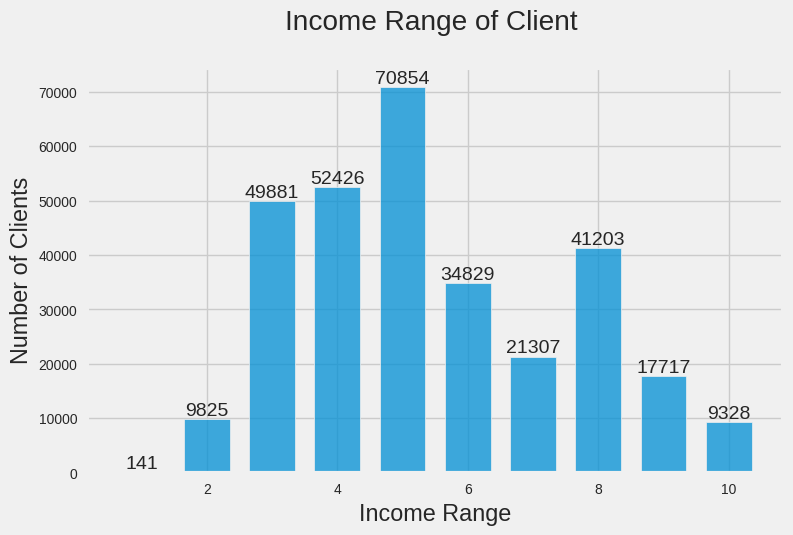

In [ ]:
# Visualisasi INCOME_BINS
count_bins_total = sns.histplot(feature_final, x="INCOME_BINS", shrink=.7)
for i in count_bins_total.containers:
    count_bins_total.bar_label(i)
plt.title('Income Range of Client \n')
plt.xlabel('Income Range')
plt.ylabel('Number of Clients')
plt.show()

## Bin AMT_CREDIT_SUM_DEBT

In [ ]:
feature_final['AMT_CREDIT_SUM_DEBT'].min()

-2796723.72

In [ ]:
feature_final['AMT_CREDIT_SUM_DEBT'].max()

164032200.0

In [ ]:
# Menentukan batas binning
bins_debt = [feature_final['AMT_CREDIT_SUM_DEBT'].min(), 0, 4000000, 8000000, 12000000, 16000000, 20000000, 24000000, 28000000, feature_final['AMT_CREDIT_SUM_DEBT'].max()]
labels_debt = [-1, 1, 2, 3, 4, 5, 6, 7, 8]

# Tambahkan kolom baru dengan nilai binning AMT_INCOME_TOTAL
feature_final['AMT_CREDIT_SUM_DEBT_BINS'] = pd.cut(feature_final['AMT_CREDIT_SUM_DEBT'], bins=bins_debt, labels=labels_debt)

In [ ]:
feature_final.head()

,SK_ID_CURR,TARGET,EXT_SOURCE_2,EXT_SOURCE_3,EXT_SOURCE_1,DAYS_BIRTH,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT_x,NAME_EDUCATION_TYPE,CODE_GENDER,DAYS_EMPLOYED,NAME_INCOME_TYPE,FLAG_DOCUMENT_3,DAYS_REGISTRATION,NAME_HOUSING_TYPE,DEF_60_CNT_SOCIAL_CIRCLE,NAME_CONTRACT_TYPE_x,AMT_CREDIT_x,TOTALAREA_MODE,AMT_INCOME_TOTAL,AMT_CREDIT_MAX_OVERDUE,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,SK_DPD_DEF_x,SK_DPD,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_INST_MIN_REGULARITY,CNT_INSTALMENT_MATURE_CUM,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS_y,NAME_CONTRACT_TYPE_y,AMT_ANNUITY,AMT_APPLICATION,DAYS_FIRST_DRAWING,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,AMT_INSTALMENT,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT_y,ORGANIZATION_TYPE,FLAG_ASSET,FLAG_CONTACTS,FLAG_DOCS,FLAG_ADDR,YEARS_EMPLOYED,INCOME_BAND,PERCENT_ANNUITY_INCOME,PERCENT_CREDIT_INCOME,EXP_CAR,EXP_HOUSE,AGE,age_status,AGE_STATUS,INCOME_BINS,AMT_CREDIT_SUM_DEBT_BINS
0,100002,1,0.262949,0.139376,0.083037,-9461,2,2,Secondary / secondary special,M,-637,Working,1,-3648.0,House / apartment,2,Cash loans,406597.5,0.0149,202500.0,0.0,40761.0,0.0,0,0,56.970,135000,1700.325,35,XAP,Approved,Consumer loans,9251.775,179055.0,365243,125,-25,-17,9251.775,351000.0,0.018801,1,2,6,2.0,4.0,1.0,0.0,2.0,7.0,12.20,49.80,0.0,2.0207,25.920548,young,young,7,-1
1,100003,0,0.622246,0.535276,0.311267,-16765,1,1,Higher education,F,-1188,State servant,1,-1186.0,House / apartment,0,Cash loans,1293502.5,0.0714,270000.0,0.0,22248.0,0.0,0,0,63975.555,45000,2250.000,69,XNA,Approved,Cash loans,98356.995,900000.0,365243,-386,-536,-527,98356.995,1129500.0,0.003541,2,1,40,0.0,4.0,1.0,0.0,3.0,8.0,13.22,20.87,0.0,2.8790,45.931507,old,old,8,-1
2,100004,0,0.555912,0.729567,0.505998,-19046,2,2,Secondary / secondary special,M,-225,Working,0,-4260.0,House / apartment,0,Revolving loans,135000.0,0.0688,67500.0,0.0,94500.0,0.0,0,0,31815.225,450000,2250.000,30,XAP,Approved,Consumer loans,5357.250,24282.0,365243,-694,-724,-714,5357.250,135000.0,0.010032,1,2,12,3.0,5.0,0.0,0.0,1.0,3.0,10.00,50.00,7.0,0.0000,52.180822,old,old,3,-1
3,100006,0,0.650442,0.535276,0.505998,-19005,2,2,Secondary / secondary special,F,-3039,Working,1,-9833.0,House / apartment,0,Cash loans,312682.5,0.0688,135000.0,0.0,103950.0,0.0,0,0,236572.110,225000,11795.760,10,XNA,Approved,Cash loans,24246.000,675000.0,365243,1259,-151,-143,29027.520,297000.0,0.008019,2,2,6,2.0,3.0,1.0,0.0,8.0,5.0,21.99,43.17,0.0,0.0000,52.068493,old,old,5,-1
4,100007,0,0.322738,0.535276,0.505998,-19932,2,2,Secondary / secondary special,M,-3038,Working,0,-4311.0,House / apartment,0,Cash loans,513000.0,0.0688,121500.0,0.0,146250.0,0.0,0,0,453919.455,450000,22924.890,101,XNA,Approved,Cash loans,16509.600,180000.0,365243,-324,-354,-347,1834.290,513000.0,0.028663,1,2,38,2.0,3.0,1.0,1.0,8.0,4.0,18.00,23.68,0.0,0.0000,54.608219,old,old,4,-1


In [ ]:
bins_debt_counts = feature_final['AMT_CREDIT_SUM_DEBT_BINS'].value_counts()
bins_debt_counts

-1    253223
1      52947
2        957
3        283
4         66
6         12
5         10
8          9
7          3
Name: AMT_CREDIT_SUM_DEBT_BINS, dtype: int64

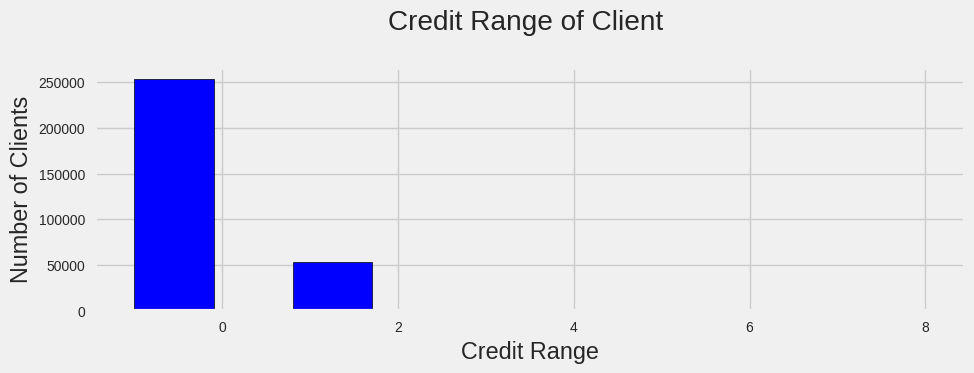

In [ ]:
# Visualisasi AMT_CREDIT_SUM_DEBT_BINS
plt.figure(figsize=(10,3))
plt.hist(feature_final['AMT_CREDIT_SUM_DEBT_BINS'], bins=10, edgecolor='black', color='blue')
plt.title('Credit Range of Client \n')
plt.xlabel('Credit Range')
plt.ylabel('Number of Clients')
plt.show()

# Feature Selection

In [ ]:
import pandas as pd
from sklearn.feature_selection import mutual_info_classif

# Check the number of samples
print("Number of samples in X:", len(X))
print("Number of samples in y:", len(y))

# Ensure X and y have the same number of samples
min_samples = min(len(X), len(y))
X = X[:min_samples]
y = y[:min_samples]

# calculate mutual info score
mi = mutual_info_classif(X, y)

# create a dataframe to store the scores
df_mi = pd.DataFrame({'Feature': X.columns, 'Mutual_Info_Score': mi}

Number of samples in X: 265151
Number of samples in y: 307511


In [ ]:
print(df_mi)

                        Feature  Mutual_Info_Score
0                    SK_ID_CURR           0.000000
1                  EXT_SOURCE_2           0.000609
2                  EXT_SOURCE_3           0.000298
3                  EXT_SOURCE_1           0.011859
4                    DAYS_BIRTH           0.000242
5   REGION_RATING_CLIENT_W_CITY           0.042164
6        REGION_RATING_CLIENT_x           0.021680
7           NAME_EDUCATION_TYPE           0.031118
8                   CODE_GENDER           0.016082
9                 DAYS_EMPLOYED           0.004844
10             NAME_INCOME_TYPE           0.022985
11              FLAG_DOCUMENT_3           0.048580
12            DAYS_REGISTRATION           0.000000
13            NAME_HOUSING_TYPE           0.044766
14     DEF_60_CNT_SOCIAL_CIRCLE           0.001376
15         NAME_CONTRACT_TYPE_x           0.001379
16                 AMT_CREDIT_x           0.000592
17               TOTALAREA_MODE           0.007849
18             AMT_INCOME_TOTAL

In [ ]:
# # import library
# from sklearn.feature_selection import mutual_info_classif

# # calculate mutual info score
# mi = mutual_info_classif(X, y)

# # create a dataframe to store the scores
# mi_df = pd.DataFrame({'Feature': X.columns, 'MI Score': mi})

# # sort the dataframe by MI Score in descending order
# mi_df = mi_df.sort_values(by='MI Score', ascending=False)

# # printfeatures with highest MI Score
# print(mi_df)

In [ ]:
# Drop fitur dengan M1 Score terendah
feature_final.drop(columns=['AMT_CREDIT_MAX_OVERDUE', 'SK_DPD_DEF_x', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_BIRTH', 
                            'AMT_BALANCE','AMT_INST_MIN_REGULARITY','PERCENT_CREDIT_INCOME', 'PERCENT_ANNUITY_INCOME',
                            'FLAG_DOCUMENT_3', 'DAYS_REGISTRATION', 'DAYS_EMPLOYED', 'REGION_RATING_CLIENT_x', 'REGION_RATING_CLIENT_y', 'FLAG_CONTACTS',
                            'AMT_ANNUITY', 'TOTALAREA_MODE', 'DAYS_EMPLOYED', 'AMT_CREDIT_MAX_OVERDUE'], inplace=True)

In [ ]:
feature_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   EXT_SOURCE_2                 307511 non-null  float64 
 3   EXT_SOURCE_3                 307511 non-null  float64 
 4   EXT_SOURCE_1                 307511 non-null  float64 
 5   REGION_RATING_CLIENT_W_CITY  307511 non-null  int64   
 6   NAME_EDUCATION_TYPE          307511 non-null  object  
 7   CODE_GENDER                  307511 non-null  object  
 8   NAME_INCOME_TYPE             307511 non-null  object  
 9   NAME_HOUSING_TYPE            307511 non-null  object  
 10  DEF_60_CNT_SOCIAL_CIRCLE     307511 non-null  int64   
 11  NAME_CONTRACT_TYPE_x         307511 non-null  object  
 12  AMT_CREDIT_x                 307511 non-null

Total fitur yang akan digunakan adalah 41 fitur

#**Data Quality Checking**

## Missing value

In [ ]:
# Check Counts and Percentage of Missing Values
missing_counts = feature_final.isnull().sum().sort_values(ascending = False)
missing_percent = (feature_final.isnull().sum()*100/feature_final.shape[0]).sort_values(ascending = False)
missing_df = pd.concat([missing_counts, missing_percent], axis = 1, keys = ['Counts', '%'])
display(missing_df.head(36).style.background_gradient(cmap = 'Reds', axis = 0))

,Counts,%
EXP_HOUSE,41509,13.498379
EXP_CAR,41509,13.498379
PERCENT_CREDIT_INCOME,41509,13.498379
PERCENT_ANNUITY_INCOME,41509,13.498379
INCOME_BAND,41509,13.498379
YEARS_EMPLOYED,2100,0.682902
FLAG_DOCS,1021,0.332021
FLAG_ASSET,1021,0.332021
FLAG_CONTACTS,1021,0.332021
FLAG_ADDR,1021,0.332021


Karena missing value yang terdapat pada setiap kolom <= 20% maka tidak perlu dilakukan drop data, akan tetapi perlu dilakukan imputasi.

In [ ]:
# Handling missing value data numerikal dengan metode imputasi median
numerik_miss_med = ['EXP_HOUSE','EXP_CAR', 'INCOME_BAND',
                    'YEARS_EMPLOYED', 'FLAG_DOCS', 'FLAG_ASSET', 'FLAG_ADDR', 'AMT_GOODS_PRICE']
for col in numerik_miss_med:
     feature_final[col].fillna(feature_final[col].median(), inplace=True)

In [ ]:
# # Handling missing value pada kolom AMT_GOODS_PRICE
# numerik_miss_med = ['AMT_GOODS_PRICE']
# for col in numerik_miss_med:
#   feature_final[col].fillna(feature_final[col].median(), inplace=True)

Handling missing value data kategorikal dengan metode imputasi modus

In [ ]:
# # Imputasi missingvalue pada fitur AMT_CREDIT_SUM_DEBT_BINS 
dataMiss = feature_final['AMT_CREDIT_SUM_DEBT_BINS'].mode()[0]
feature_final['AMT_CREDIT_SUM_DEBT_BINS'].fillna(dataMiss, inplace=True)

# # Imputasi missingvalue pada fitur NAME_CONTRACT_STATUS_y
# dataMiss = feature_final['NAME_CONTRACT_STATUS_y'].mode()[0]
# feature_final['NAME_CONTRACT_STATUS_y'].fillna(dataMiss, inplace=True)

# # Imputasi missingvalue pada fitur NAME_CONTRACT TYPE
# dataMiss = feature_final['NAME_CONTRACT_TYPE_y'].mode()[0]
# feature_final['NAME_CONTRACT_TYPE_y'].fillna(dataMiss, inplace=True)

In [ ]:
# Cek kembali missing value
feature_final.isnull().sum()

Unnamed: 0                         0
SK_ID_CURR                         0
TARGET                             0
EXT_SOURCE_2                       0
EXT_SOURCE_3                       0
EXT_SOURCE_1                       0
DAYS_BIRTH                         0
REGION_RATING_CLIENT_W_CITY        0
REGION_RATING_CLIENT_x             0
NAME_EDUCATION_TYPE                0
CODE_GENDER                        0
DAYS_EMPLOYED                      0
NAME_INCOME_TYPE                   0
FLAG_DOCUMENT_3                    0
DAYS_REGISTRATION                  0
NAME_HOUSING_TYPE                  0
DEF_60_CNT_SOCIAL_CIRCLE           0
NAME_CONTRACT_TYPE_x               0
AMT_CREDIT_x                       0
TOTALAREA_MODE                     0
AMT_INCOME_TOTAL                   0
AMT_CREDIT_MAX_OVERDUE             0
AMT_CREDIT_SUM                     0
AMT_CREDIT_SUM_DEBT                0
SK_DPD_DEF_x                       0
SK_DPD                             0
AMT_BALANCE                        0
A

Sudah tidak terdapat missing value lagi

## Cek Duplikat

In [ ]:
# Melihat data duplikat
feature_final.duplicated().sum()

0

In [ ]:
print(feature_final.duplicated().sum()) # Melihat jumlah data duplicate

0


In [ ]:
# Melihat jumlah data yang missing value
print(feature_final.duplicated(subset='SK_ID_CURR').sum()) # Melihat data duplikat pada feature SK_ID_CURR

0


<Axes: title={'center': 'Loan Repayed or not'}, ylabel='values'>

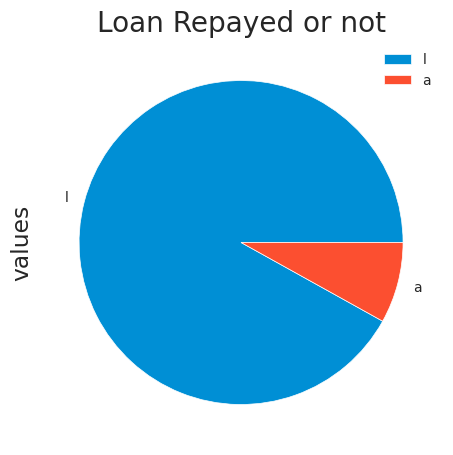

In [ ]:
temp = feature_final["TARGET"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
df.plot(kind='pie', y='values', labels='labels', title='Loan Repayed or not')


In [ ]:
feature_final['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

## Cek Outlier

In [ ]:
df_to_plot = feature_final.select_dtypes(include=['float','int'])

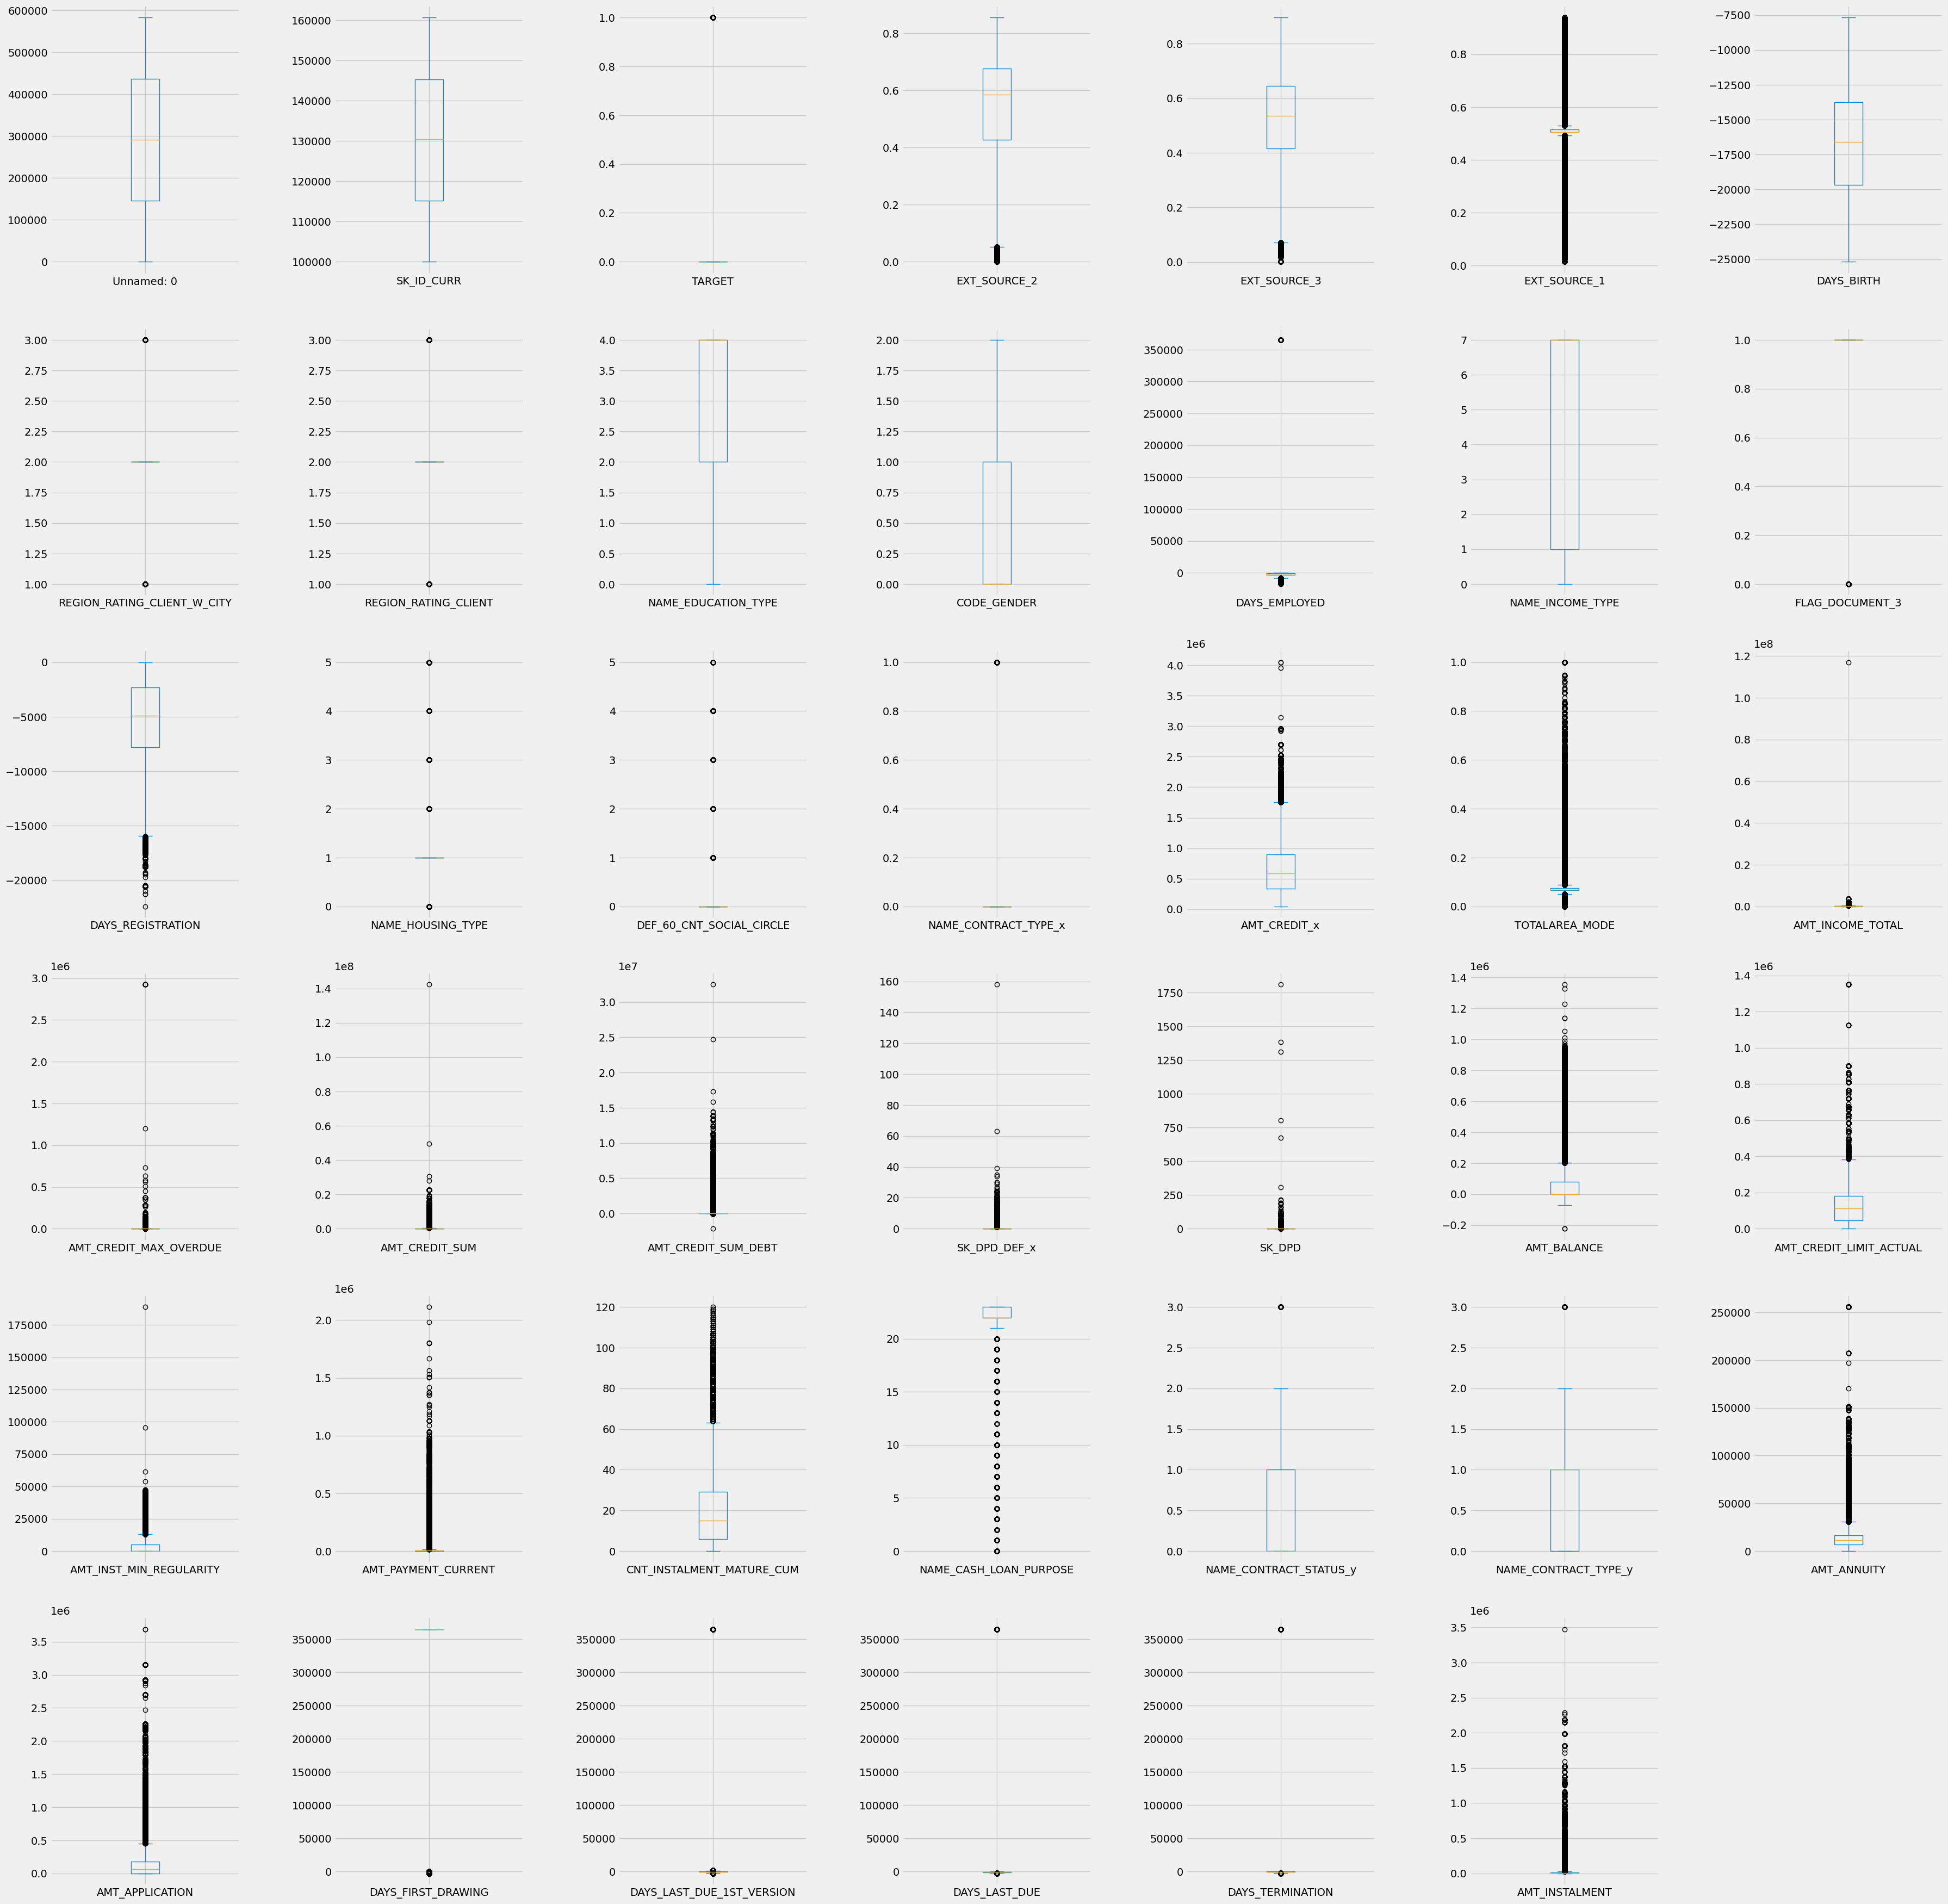

In [ ]:
df_to_plot.plot(subplots=True, layout=(7,7), kind='box', figsize=(40,50))
plt.subplots_adjust(wspace=0.5);

# Clean Features

Clean features ini merupakan fitur-fitur yang telah dimasukkan ke dataset baru sebagai fitur final dan fitur yang akan di bawa ke model

In [ ]:
feature_final = pd.read_csv('/content/drive/MyDrive/dataset/feature_fix.csv')

In [ ]:
feature_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   EXT_SOURCE_2                 307511 non-null  float64
 3   EXT_SOURCE_3                 307511 non-null  float64
 4   EXT_SOURCE_1                 307511 non-null  float64
 5   REGION_RATING_CLIENT_W_CITY  307511 non-null  int64  
 6   NAME_EDUCATION_TYPE          307511 non-null  object 
 7   CODE_GENDER                  307511 non-null  object 
 8   NAME_INCOME_TYPE             307511 non-null  object 
 9   NAME_HOUSING_TYPE            307511 non-null  object 
 10  DEF_60_CNT_SOCIAL_CIRCLE     307511 non-null  int64  
 11  NAME_CONTRACT_TYPE_x         307511 non-null  object 
 12  AMT_CREDIT_x                 307511 non-null  float64
 13 

In [ ]:
feature_final.sample(2)

,SK_ID_CURR,TARGET,EXT_SOURCE_2,EXT_SOURCE_3,EXT_SOURCE_1,REGION_RATING_CLIENT_W_CITY,NAME_EDUCATION_TYPE,CODE_GENDER,NAME_INCOME_TYPE,NAME_HOUSING_TYPE,DEF_60_CNT_SOCIAL_CIRCLE,NAME_CONTRACT_TYPE_x,AMT_CREDIT_x,AMT_INCOME_TOTAL,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,SK_DPD,AMT_CREDIT_LIMIT_ACTUAL,CNT_INSTALMENT_MATURE_CUM,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS_y,NAME_CONTRACT_TYPE_y,AMT_APPLICATION,DAYS_FIRST_DRAWING,DAYS_LAST_DUE,DAYS_TERMINATION,AMT_INSTALMENT,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,FLAG_ASSET,FLAG_DOCS,FLAG_ADDR,YEARS_EMPLOYED,INCOME_BAND,EXP_CAR,EXP_HOUSE,AGE,AGE_STATUS,INCOME_BINS,AMT_CREDIT_SUM_DEBT_BINS
290977,437082,1,0.545860,0.116867,0.646453,2,Higher education,F,Working,House / apartment,0,Cash loans,1006920.0,180000.0,900000.000,827293.5,0,180000,32,XAP,Approved,Revolving loans,45000.0,365243,365243,365243,69985.620,900000.0,0.009657,3,6,0,0,0,-810,0,0,0.0,35.676712,adult,6,1
136751,258608,0,0.631702,0.656158,0.400656,1,Secondary / secondary special,F,Commercial associate,House / apartment,0,Cash loans,640080.0,211500.0,32200.605,0.0,0,45000,0,XAP,Approved,Revolving loans,0.0,-1140,365243,365243,22925.115,450000.0,0.072508,2,6,0,0,0,-1756,0,0,0.0,34.534247,adult,7,-1


In [ ]:
feature_final.shape

(307511, 42)

In [ ]:
df  = feature_final[['TARGET','AMT_CREDIT_x','AMT_INCOME_TOTAL','AMT_CREDIT_SUM','AMT_CREDIT_SUM_DEBT']]

In [ ]:
# Memisahkan dataset menjadi training set dan sisa dataset (validation + test set)
from sklearn.model_selection import train_test_split
X = df.drop(['TARGET'], axis=1)
y = df['TARGET']
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Memisahkan sisa dataset menjadi validation set dan test set
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)



In [ ]:
model_rf  = RandomForestClassifier()

In [ ]:
model_rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
model_rf_pred = model_rf.predict(X_test)

In [ ]:
# # Evaluasi kinerja Logistic Regression dengan data ujiaccuracies = {}  # Initialize the accuracies dictionary
# accuracies = {}  # Initialize the accuracies dictionary
# accuracy_rf = accuracy_score(y_test, model_rf_pred)*100
# accuracies['Random Forest'] = accuracy_rf
# print(f"Random Forest accuracy score: {accuracy_rf:.2f}%")

Random Forest accuracy score: 90.89%


In [ ]:
df['AMT_CREDIT_x_IDR'] = df['AMT_CREDIT_x'] * 14000

In [ ]:
df.sketch.howto('convert amt_credit_x ke dalam bentuk idr')

#**Exploratory Data Analysis (EDA)**

SK_ID_CURR hanyalah ID pinjaman yang unik untuk setiap individu. Itu tidak akan berkontribusi pada algoritma prediksi. --> DROP

Variabel 'TARGET' adalah salah satu yang kami coba prediksi, jadi kami TIDAK akan menggunakannya sebagai fitur.

In [ ]:
#df_featurefinal2 = pd.read_csv('feature_final2.csv')
#df_featurefinal2.info(verbose=True, null_counts=True)
feature_final = pd.read_csv('feature_fix.csv')

In [ ]:
feature_final.head()

In [ ]:
#ff2 = df_featurefinal2.drop(df_featurefinal2.columns[0], axis=1)
ff2 = feature_final

In [ ]:
# Show target distribution
sns.set_style('darkgrid')
print(ff2.TARGET.value_counts())
# Distribution of target
clrs = ['grey' if (x < max(ff2['TARGET'].value_counts())) else '#BE223A' for x in ff2['TARGET'].value_counts() ]

ax = sns.countplot(x=ff2['TARGET'],
                   palette = clrs,
                   order=ff2['TARGET'].value_counts(ascending=False).index);
        
abs_values =ff2['TARGET'].value_counts(ascending=False)
rel_values =ff2['TARGET'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]

ax.bar_label(container=ax.containers[0], labels=lbls)

In [ ]:
ff2.isnull().sum()

In [ ]:
# FLAG_OWN_CAR
list_col_drop = ['SK_ID_CURR']

In [ ]:
numericals = ff2.select_dtypes(include=['int64','float64']).columns.tolist()
categoricals = ff2.select_dtypes(exclude=['int64','float64']).columns.tolist()

print(f"numericals columns are {numericals}")
print(f"categoricals columns are {categoricals}")

In [ ]:
ff2[numericals].describe()

In [ ]:
ff2[categoricals].describe()

In [ ]:
for col in categoricals:
  print(f"Value counts of {col} column")
  print(ff2[col].value_counts(), '\n')

In [ ]:
import seaborn as sns 
sns.pairplot(ff2[['NAME_CONTRACT_TYPE_x','AMT_CREDIT_x','AMT_ANNUITY','AMT_GOODS_PRICE']],
             hue='NAME_CONTRACT_TYPE_x', palette = ['grey','#BE223A']);

In [ ]:
sns.pairplot(ff2[['NAME_CONTRACT_TYPE_y','AMT_CREDIT_x','AMT_ANNUITY','AMT_GOODS_PRICE']],
             hue='NAME_CONTRACT_TYPE_y', palette = ['grey','#BE223A']);

In [ ]:
corr1=round(ff2.AMT_CREDIT_x.corr(ff2.AMT_GOODS_PRICE),2)
corr2=round(ff2.AMT_ANNUITY.corr(ff2.AMT_CREDIT_x),2)
corr3=round(ff2.AMT_ANNUITY.corr(ff2.AMT_GOODS_PRICE),2)

In [ ]:
print('Correlation of Credit amount vs Price of goods:',corr1)
print('Correlation of Annuity amount vs Credit amount:',corr2)
print('Correlation of Annuity amount vs Price of goods:',corr3)

In [ ]:
cash=ff2[ff2.NAME_CONTRACT_TYPE_x == 'Cash loans']
rev=ff2[ff2.NAME_CONTRACT_TYPE_x == 'Revolving loans']
def_cash=cash[cash.TARGET==1]
def_rev=rev[rev.TARGET==1]

In [ ]:
print('Percentage of defaulted cash loan:',round(len(def_cash)/len(cash)*100,2,),'%')
print('Percentage of defaulted revolving loan:',round(len(def_rev)/len(rev)*100,2),'%')
clrs = ['grey' if (x < max(ff2['TARGET'].value_counts())) else '#BE223A' for x in ff2['TARGET'].value_counts() ]
ax = sns.countplot(data=ff2,x='NAME_CONTRACT_TYPE_x',palette=clrs,
                   order=ff2['NAME_CONTRACT_TYPE_x'].value_counts(ascending=False).index);
        
abs_values =ff2['NAME_CONTRACT_TYPE_x'].value_counts(ascending=False)
rel_values =ff2['NAME_CONTRACT_TYPE_x'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]

ax.bar_label(container=ax.containers[0], labels=lbls)

plt.show()

In [ ]:
# COLUMNS TO BE DROPPED
list_col_drop.extend(['NAME_CONTRACT_TYPE_x','AMT_GOODS_PRICE'])

In [ ]:
cols_to_fill = ['FLAG_ASSET', 'FLAG_CONTACTS', 'FLAG_DOCS', 'FLAG_ADDR']
ff2[cols_to_fill] = ff2[cols_to_fill].fillna(-1)
ff2

In [ ]:
corr = ff2['YEARS_EMPLOYED'].corr(ff2['DAYS_EMPLOYED'])
print(corr)


In [ ]:
ff2['DAYS_EMPLOYED'] = ff2['DAYS_EMPLOYED'].abs()
ff2

In [ ]:
ff2['YEARS_EMPLOYED'] = ff2['DAYS_EMPLOYED']/365
ff2

In [ ]:
tempY=data_train[data_train.FLAG_OWN_CAR=='Y']
tempN=data_train[data_train.FLAG_OWN_CAR=='N']
tempY_targ1=tempY[tempY.TARGET==1]
tempN_targ1=tempN[tempN.TARGET==1]

In [ ]:
print('People count who owns a car:',len(tempY),'(',round(len(tempY)/len(data_train.index)*100,2),'%)')
print('People count who DOES NOT own a car:',len(tempN),'(',round(len(tempN)/len(data_train.index)*100,2),'%)')
print('Percentage of people who defaulted (with cars):',round(len(tempY_targ1)/len(tempY)*100,2),'%')
print('Percentage of people who defaulted (no cars):',round(len(tempN_targ1)/len(tempN)*100,2),'%')

People count who owns a car: 104587 ( 34.01 %)
People count who DOES NOT own a car: 202924 ( 65.99 %)
Percentage of people who defaulted (with cars): 7.24 %
Percentage of people who defaulted (no cars): 8.5 %


In [ ]:
tempY=data_train[data_train.FLAG_OWN_REALTY=='Y']
tempN=data_train[data_train.FLAG_OWN_REALTY=='N']
tempY_targ1=tempY[tempY.TARGET==1]
tempN_targ1=tempN[tempN.TARGET==1]

In [ ]:
print('People count who DOES NOT own realty:',len(tempN),'(',round(len(tempN)/len(data_train.index)*100,2),'%)')
print('Percentage of people who defaulted (with realty):',round(len(tempY_targ1)/len(tempY)*100,2),'%')
print('Percentage of people who defaulted (no realty):',round(len(tempN_targ1)/len(tempN)*100,2),'%')

People count who DOES NOT own realty: 94199 ( 30.63 %)
Percentage of people who defaulted (with realty): 7.96 %
Percentage of people who defaulted (no realty): 8.32 %


## Pendidikan Pelamar dalam hal pinjaman dilunasi atau tidak dalam %

In [ ]:
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot

In [ ]:
temp = feature_final["NAME_EDUCATION_TYPE"].value_counts()
#print(temp.values)
temp_y0 = []
temp_y1 = []
for val in temp.index:
    temp_y1.append(np.sum(feature_final["TARGET"][feature_final["NAME_EDUCATION_TYPE"]==val] == 1))
    temp_y0.append(np.sum(feature_final["TARGET"][feature_final["NAME_EDUCATION_TYPE"]==val] == 0))    
trace1 = go.Bar(
    x = temp.index,
    y = (temp_y1 / temp.sum()) * 100,
    name='YES'
)
trace2 = go.Bar(
    x = temp.index,
    y = (temp_y0 / temp.sum()) * 100, 
    name='NO'
)

data = [trace1, trace2]
layout = go.Layout(
    title = "Education of Applicant's in terms of loan is repayed or not in %",
    #barmode='stack',
    width = 1000,
    xaxis=dict(
        title='Education of Applicant\'s',
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
    ),
    yaxis=dict(
        title='Count in %',
        titlefont=dict(
            size=16,
            color='rgb(107, 107, 107)'
        ),
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
)
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

## Cek Count Age Status ke Target

In [ ]:
temp = feature_final["AGE_STATUS"].value_counts()
#print(temp.values)
temp_y0 = []
temp_y1 = []
for val in temp.index:
    temp_y1.append(np.sum(feature_final["TARGET"][feature_final["AGE_STATUS"]==val] == 1))
    temp_y0.append(np.sum(feature_final["TARGET"][feature_final["AGE_STATUS"]==val] == 0))    
trace1 = go.Bar(
    x = temp.index,
    y = (temp_y1 / temp.sum()) * 100,
    name='YES'
)
trace2 = go.Bar(
    x = temp.index,
    y = (temp_y0 / temp.sum()) * 100, 
    name='NO'
)

data = [trace1, trace2]
layout = go.Layout(
    title = "Age to Target",
    #barmode='stack',
    width = 1000,
    xaxis=dict(
        title='Age of Applicant\'s',
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
    ),
    yaxis=dict(
        title='Count in %',
        titlefont=dict(
            size=16,
            color='rgb(107, 107, 107)'
        ),
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
)
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

## Pendidikan Pemohon yang mengajukan pinjaman

In [ ]:
import pandas as pd
import plotly.express as px

temp = feature_final["NAME_EDUCATION_TYPE"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values})

fig = px.pie(df, names='labels', values='values', hole=0.5, title="Education of Applicant")
fig.show()


71% pelamar memiliki pendidikan menengah dan 24,3% memiliki pendidikan tinggi.

## Sumber pendapatan Pemohon yang mengajukan pinjaman

In [ ]:
import pandas as pd
import plotly.express as px

temp = feature_final["NAME_INCOME_TYPE"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values})

fig = px.pie(df, names='labels', values='values', hole=0.5, title="Income sources of Applicants")
fig.show()


51.6 % Pelamar menyebutkan bahwa mereka sedang bekerja. 23,3% adalah Rekanan Komersial dan 18% adalah Pensiunan dll.

71% pelamar memiliki pendidikan menengah dan 24,3% memiliki pendidikan tinggi.

## Types of Loan

Pinjaman bergulir : Pengaturan yang memungkinkan jumlah pinjaman ditarik, dilunasi, dan ditarik kembali dengan cara apapun dan berapa kali, sampai pengaturan berakhir. Pinjaman kartu kredit dan cerukan adalah pinjaman bergulir. 

In [ ]:
temp = feature_final["NAME_CONTRACT_TYPE_x"].value_counts()
fig = {
  "data": [
    {
      "values": temp.values,
      "labels": temp.index,
      "domain": {"x": [0, .48]},
      #"name": "Types of Loans",
      #"hoverinfo":"label+percent+name",
      "hole": .7,
      "type": "pie"
    },
    
    ],
  "layout": {
        "title":"Types of loan",
        "annotations": [
            {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": "Loan Types",
                "x": 0.17,
                "y": 0.5
            }
            
        ]
    }
}
iplot(fig, filename='donut')



Sebagian besar pinjaman adalah pinjaman Tunai yang diambil oleh pelamar. 90,5% pinjaman adalah pinjaman Tunai

## Untuk jenis rumah apa yang lebih tinggi pemohon mengajukan pinjaman ?

In [ ]:
temp = feature_final["NAME_HOUSING_TYPE"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values})

fig = px.pie(df, names='labels', values='values', hole=0.5, title="Type of House")
fig.show()


Kira-kira 88.7 % orang mengajukan pinjaman, mereka menyebutkan jenis tempat tinggal mereka adalah Rumah / Apartemen.

## Cek distribusi target

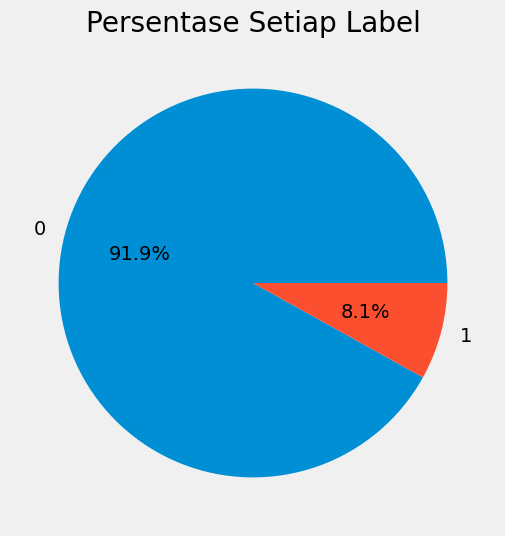

In [ ]:
# Visualization Count Value of Feature : TARGET 
# Menghitung persentase setiap label
label_counts = feature_final['TARGET'].value_counts()
label_percentages = label_counts / label_counts.sum() * 100

# Menggambar grafik pie dengan persentase label
plt.figure(figsize=(8, 6))
plt.pie(label_percentages, labels=label_percentages.index, autopct='%1.1f%%')
plt.title('Persentase Setiap Label')
plt.show()

Dari data ini dapat kita lihat bahwa data dari fitur target tidak seimbang (Imbalanced)

Insight: Dari grafik di atas, kita melihat individu yang diklasifikasikan sebagai peminjam yang tidak mampu membayar pinjaman memiliki sangat sedikit observasi. Ketidakseimbangan kelas ini dapat mempengaruhi model kita saat pelatihan. Untuk mengatasi masalah ini, kami akan melakukan oversampling

<Axes: title={'center': '\nClients Repayment Abilities By Name Contract Type\n'}, xlabel='NAME_CONTRACT_TYPE_x', ylabel='count'>

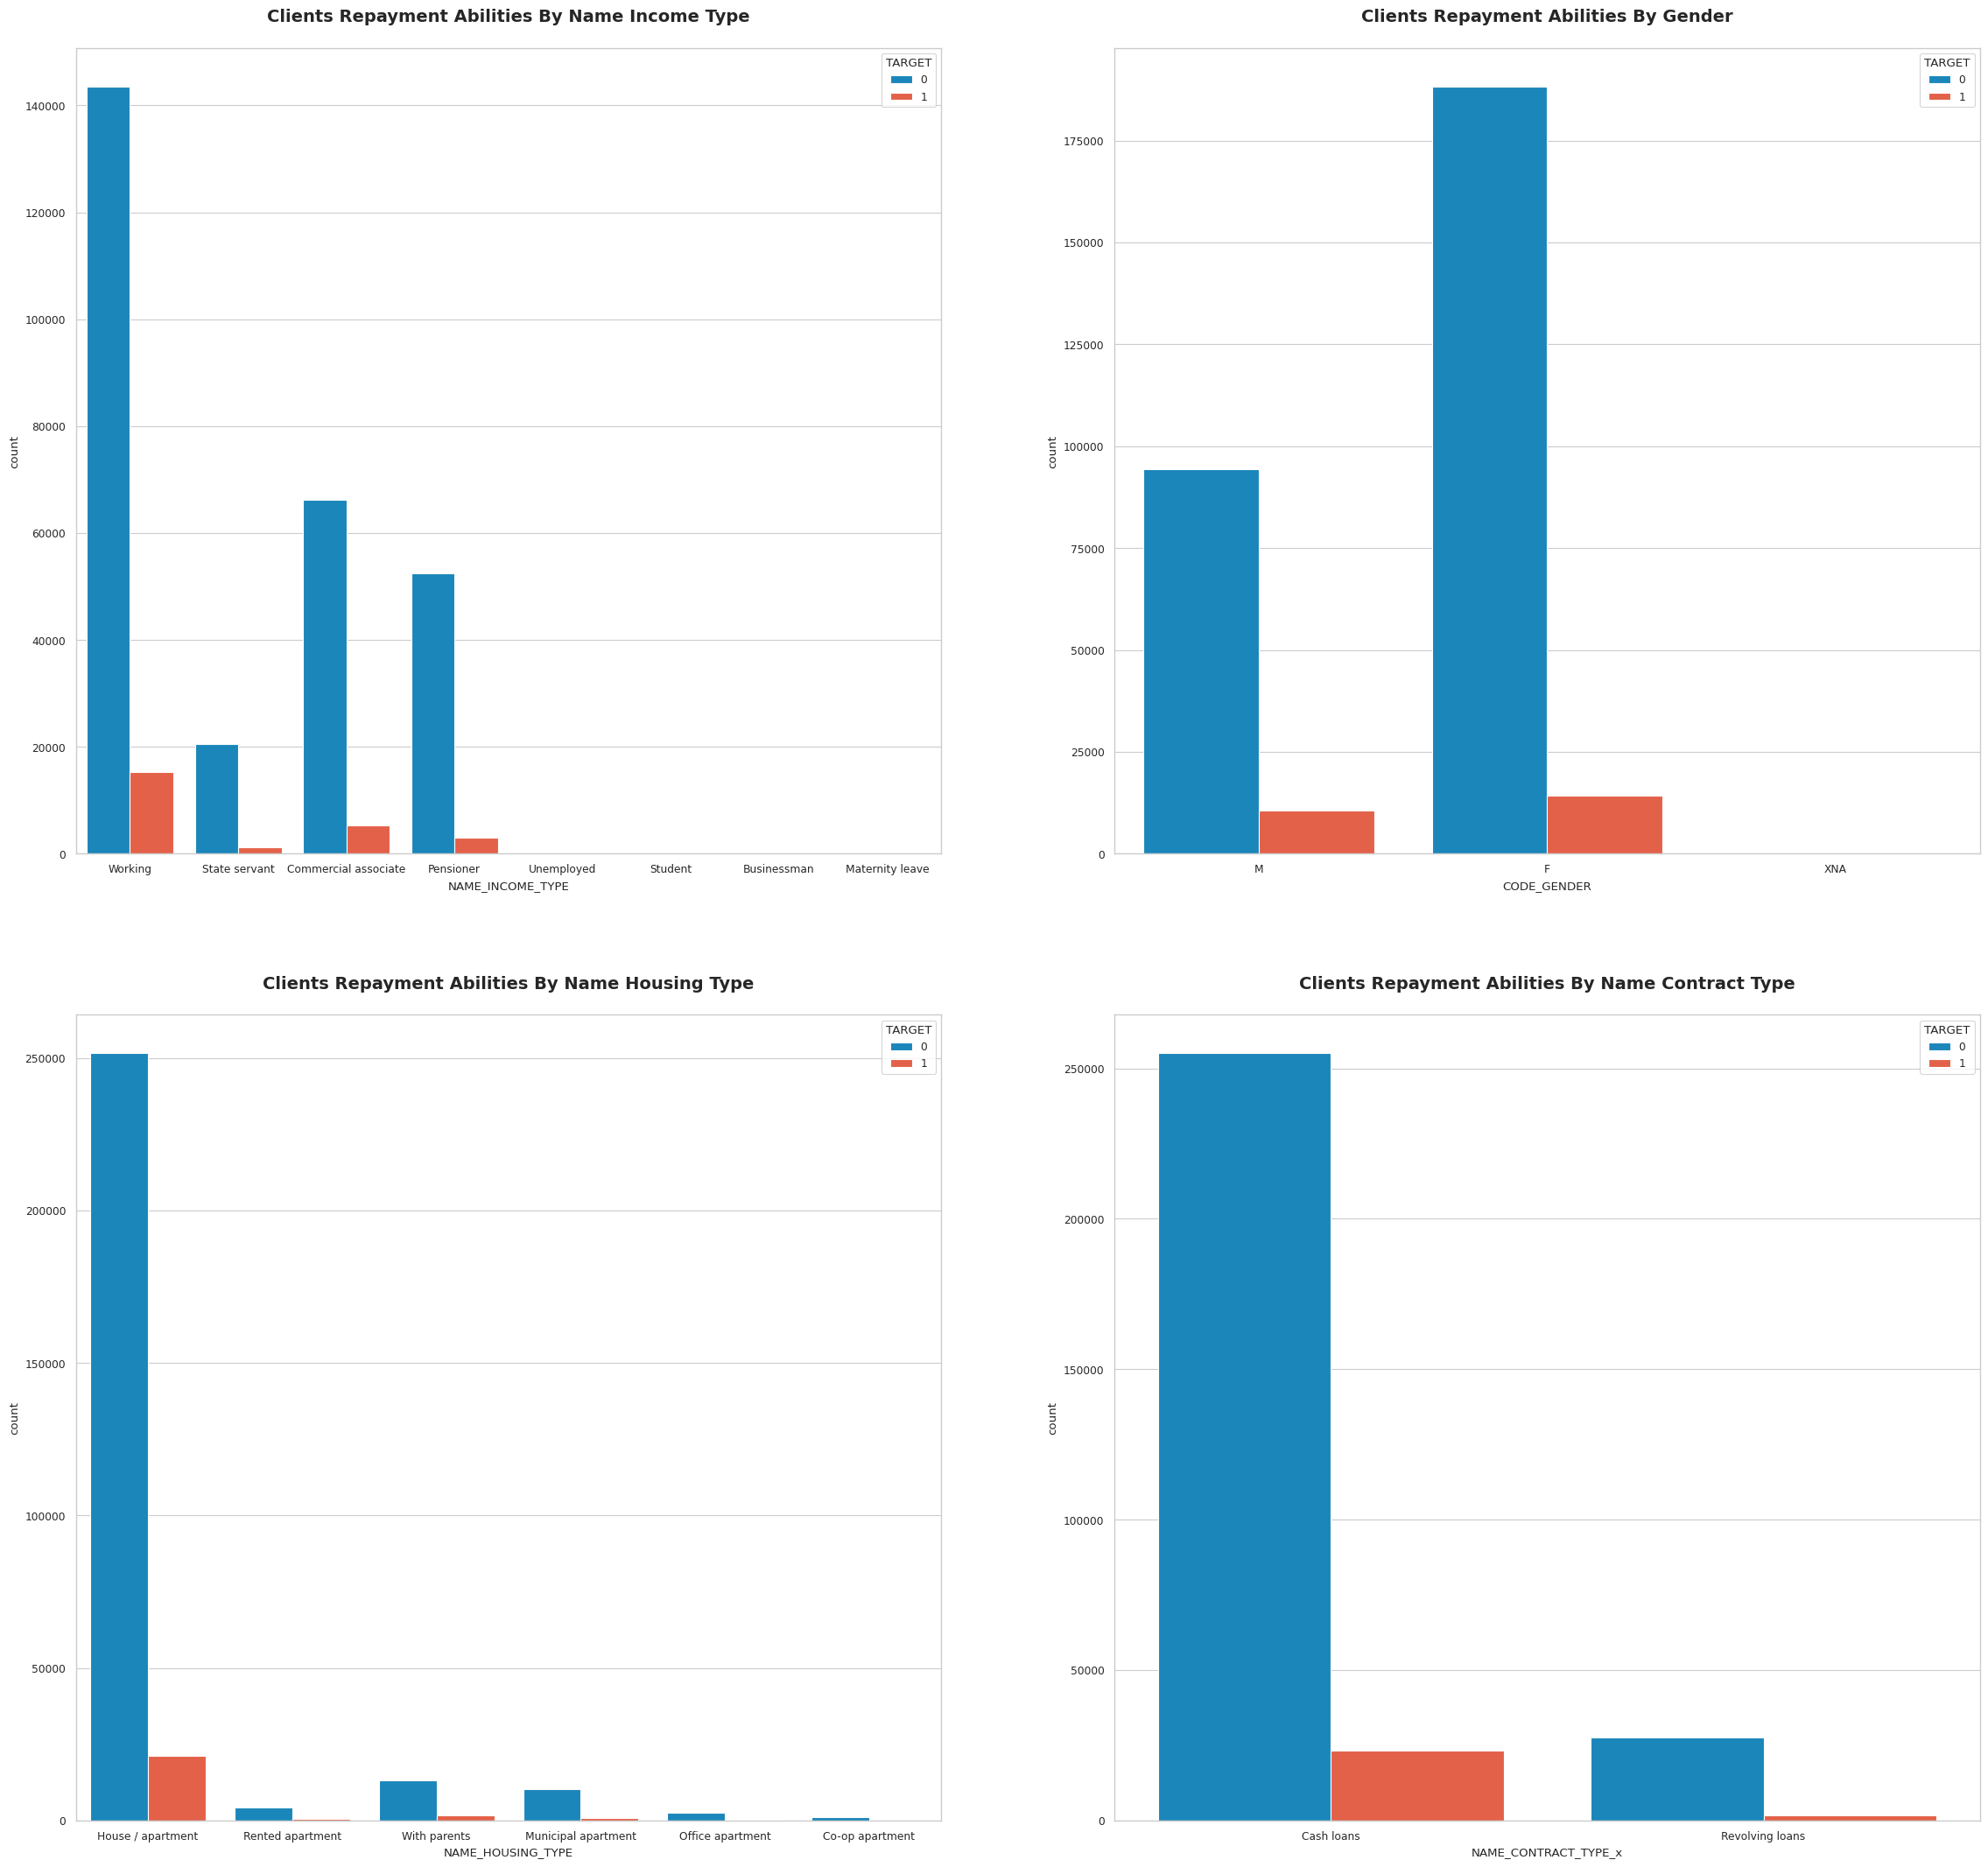

In [ ]:
# visualization pt 1
sns.set_style('whitegrid')
fig, ax = plt.subplots(2,2, figsize=(25,25))
sns.set_context('paper', font_scale=1)

ax[0][0].set_title('Clients Repayment Abilities By Name Income Type\n', fontweight='bold', fontsize=14)
sns.countplot(x='NAME_INCOME_TYPE', data = feature_final, hue = 'TARGET', ax=ax[0][0])

ax[0][1].set_title('Clients Repayment Abilities By Gender\n', fontweight='bold', fontsize=14)
sns.countplot(x='CODE_GENDER', data = feature_final, hue = 'TARGET', ax=ax[0][1])

ax[1][0].set_title('\nClients Repayment Abilities By Name Housing Type\n', fontweight='bold', fontsize=14)
sns.countplot(x='NAME_HOUSING_TYPE', data = feature_final, hue = 'TARGET', ax=ax[1][0])

ax[1][1].set_title('\nClients Repayment Abilities By Name Contract Type\n', fontweight='bold', fontsize=14)
sns.countplot(x='NAME_CONTRACT_TYPE_x', data = feature_final, hue = 'TARGET', ax=ax[1][1])

Insight: .....

In [ ]:
gt = feature_final.groupby(by=['CODE_GENDER','TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Clients Repayment Abilities By Gender')
gt.sort_values(by='SK_ID_CURR', ascending=False)
gt.style.background_gradient(cmap='Blues')

In [ ]:
feature_final[['CODE_GENDER','TARGET']].groupby(['CODE_GENDER'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False)

Insight: Peminjam ber-gender perempuan telah mengajukan sebagian besar pinjaman. Secara total, ada sekitar 389.584 aplikasi pinjaman yang diajukan oleh perempuan, dan sekitar 193.150 aplikasi diajukan peminjam laki-laki.

Namun, persentase yang lebih besar (sekitar 9,6% dari total) peminjam laki-laki memiliki masalah dalam membayar pinjaman dibandingkan dengan nasabah perempuan (sekitar 6,5% dari total).

In [ ]:
rt = feature_final.groupby(by=['NAME_INCOME_TYPE','TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Clients Repayment Abilities By Income Type')
rt.sort_values(by='SK_ID_CURR', ascending=False)
rt.style.background_gradient(cmap='Blues')

In [ ]:
feature_final[['NAME_INCOME_TYPE','TARGET']].groupby(['NAME_INCOME_TYPE'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False)

Insight: Terlihat bahwa peminjam yang bekerja telah mengajukan sebagian besar pinjaman, yaitu sekitar 296.135 pengajuan pinjaman.

Peminjam dengan jenis pendapatan bisnis, peminjam yang mengambil cuti melahirkan, dan pelajar tidak mengalami kesulitan untuk melunasi pinjamannya.

Sedangkan peminjam yang menganggur memiliki persentase tertinggi (sekitar 47,5%) mengalami kesulitan dalam mengembalikan pinjaman.

In [ ]:
ht = feature_final.groupby(by=['NAME_HOUSING_TYPE','TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Clients Repayment Abilities By Housing Type')
ht.sort_values(by='SK_ID_CURR', ascending=False)
ht.style.background_gradient(cmap='Blues')

In [ ]:
feature_final[['NAME_HOUSING_TYPE','TARGET']].groupby(['NAME_HOUSING_TYPE'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False)

Inisght: Dapat dilihat bahwa peminjam dengan yang tinggal di cooperative apartment memiliki persentase kesulitan tertinggi (sekitar 15%) dalam mengembalikan pinjaman. Selain itu, peminjam yang tinggal bersama orang tua juga memiliki persentase yang cukup tinggi dalam mengembalikan pinjaman (sekitar 12 %).

## AMT_INCOME_TOTAL vs TARGET

In [ ]:
feature_final['INCOME_BINS'].unique()

[7, 8, 3, 5, 4, 6, 9, 2, 10, 1]
Categories (10, int64): [1 < 2 < 3 < 4 ... 7 < 8 < 9 < 10]

In [ ]:
income_target = feature_final.groupby(by=['INCOME_BINS','TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Clients Repayment Abilities By Amount Income Total')
income_target.sort_values(by='SK_ID_CURR', ascending=False)
income_target.style.background_gradient(cmap='Blues')

Clients Repayment Abilities By Amount Income Total


,INCOME_BINS,TARGET,SK_ID_CURR
0,1,0,133
1,1,1,8
2,2,0,9081
3,2,1,744
4,3,0,45744
5,3,1,4137
6,4,0,47825
7,4,1,4601
8,5,0,64807
9,5,1,6047


In [ ]:
feature_final[['INCOME_BINS','TARGET']].groupby(['INCOME_BINS'],as_index=False).mean().sort_values(by=['TARGET'], ascending=True)

,INCOME_BINS,TARGET
0,1,0.056738
9,10,0.059284
8,9,0.062426
7,8,0.073150
1,2,0.075725
6,7,0.080912
2,3,0.082937
5,6,0.083006
4,5,0.085345
3,4,0.087762


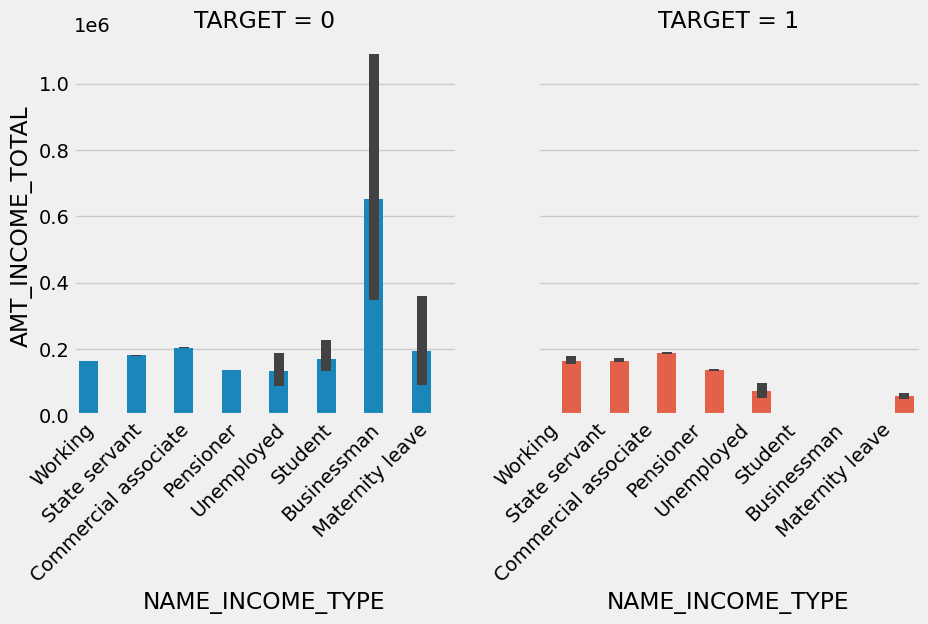

In [ ]:
fig = sns.catplot(x = 'NAME_INCOME_TYPE',
            y = 'AMT_INCOME_TOTAL', 
            hue = 'TARGET', 
            col = 'TARGET', 
            kind = 'bar',
            data = feature_final)

fig.set_xticklabels(rotation=45, horizontalalignment='right')
plt.show()

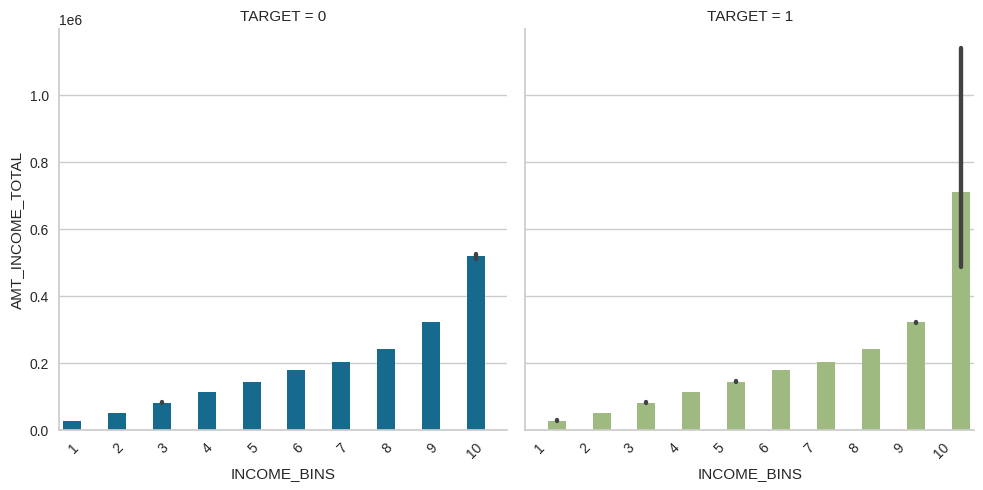

In [ ]:
fig = sns.catplot(x = 'INCOME_BINS',
            y = 'AMT_INCOME_TOTAL', 
            hue = 'TARGET', 
            col = 'TARGET', 
            kind = 'bar',
            data = feature_final)

fig.set_xticklabels(rotation=45, horizontalalignment='right')
plt.show()

## AMT_CREDIT_SUM_DEBT vs TARGET

In [ ]:
feature_final.head()

,SK_ID_CURR,TARGET,EXT_SOURCE_2,EXT_SOURCE_3,EXT_SOURCE_1,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,NAME_EDUCATION_TYPE,CODE_GENDER,DAYS_EMPLOYED,NAME_INCOME_TYPE,FLAG_DOCUMENT_3,DAYS_REGISTRATION,NAME_HOUSING_TYPE,DEF_60_CNT_SOCIAL_CIRCLE,NAME_CONTRACT_TYPE_x,AMT_CREDIT_x,TOTALAREA_MODE,AMT_INCOME_TOTAL,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,SK_DPD_DEF_x,AMT_CREDIT_LIMIT_ACTUAL,CNT_INSTALMENT_MATURE_CUM,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS_y,NAME_CONTRACT_TYPE_y,AMT_ANNUITY,AMT_APPLICATION,DAYS_FIRST_DRAWING,DAYS_LAST_DUE,DAYS_TERMINATION,AMT_INSTALMENT,AGE,age_status,AGE_BINS,INCOME_BINS
0,100002,1,0.262949,0.139376,0.083037,2,2,4,1,-637,7,1,-3648.0,1,2.0,0,406597.5,0.0149,202500.0,40761.0,0.0,0.0,135000,35.0,23,0,1,9251.775,179055.0,365243.0,-25.0,-17.0,9251.775,25.920548,2,20,7
1,100003,0,0.622246,0.535276,0.311267,1,1,1,0,-1188,4,1,-1186.0,1,0.0,0,1293502.5,0.0714,270000.0,22248.0,0.0,0.0,45000,69.0,24,0,0,98356.995,900000.0,365243.0,-536.0,-527.0,98356.995,45.931507,1,40,8
2,100004,0,0.555912,0.729567,0.505998,2,2,4,1,-225,7,0,-4260.0,1,0.0,1,135000.0,0.0688,67500.0,94500.0,0.0,0.0,450000,30.0,23,0,1,5357.250,24282.0,365243.0,-724.0,-714.0,5357.250,52.180822,1,50,3
3,100006,0,0.650442,0.535276,0.505998,2,2,4,0,-3039,7,1,-9833.0,1,0.0,0,312682.5,0.0688,135000.0,103950.0,0.0,0.0,225000,10.0,24,0,0,24246.000,675000.0,365243.0,-151.0,-143.0,29027.520,52.068493,1,50,5
4,100007,0,0.322738,0.535276,0.505998,2,2,4,1,-3038,7,0,-4311.0,1,0.0,0,513000.0,0.0688,121500.0,146250.0,0.0,0.0,450000,101.0,24,0,0,16509.600,180000.0,365243.0,-354.0,-347.0,1834.290,54.608219,1,50,4


In [ ]:
feature_final['AMT_CREDIT_SUM_DEBT'].unique()

array([      0.  ,  348007.5 ,   63724.5 , ..., 1160037.  ,   39872.25,
        186097.5 ])

In [ ]:
feature_final['AMT_CREDIT_SUM_DEBT'].max()

164032200.0

In [ ]:
debt_target = feature_final.groupby(by=['AMT_CREDIT_SUM_DEBT_BINS','TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Clients Repayment Abilities By Credit sum Debit')
debt_target.sort_values(by='SK_ID_CURR', ascending=False)
debt_target.style.background_gradient(cmap='Blues')

In [ ]:
feature_final[['AMT_CREDIT_SUM_DEBT_BINS','TARGET']].groupby(['AMT_CREDIT_SUM_DEBT_BINS'],as_index=False).count().sort_values(by=['TARGET'], ascending=True)

In [ ]:
feature_final[['AMT_CREDIT_SUM_DEBT_BINS','TARGET']].groupby(['AMT_CREDIT_SUM_DEBT_BINS'],as_index=False).mean().sort_values(by=['TARGET'], ascending=True)

In [ ]:
fig = sns.catplot(x = 'AMT_CREDIT_SUM_DEBT_BINS',
            y = 'AMT_CREDIT_SUM_DEBT', 
            hue = 'TARGET', 
            col = 'TARGET', 
            kind = 'bar',
            data = feature_final)

fig.set_xticklabels(rotation=45, horizontalalignment='right')
plt.show()

## DEF_60_CNT_SOCIAL_CIRCLE (distribusi)

In [ ]:
feature_final['DEF_60_CNT_SOCIAL_CIRCLE'].unique()

array([ 2.,  0.,  1.,  3.,  5.,  4.,  7., 24.,  6.])

In [ ]:
# Distribusi DEF_60_CNT_SOCIAL_CIRCLE
plt.figure(figsize=(12,5))
plt.title("Distribution of DEF_60_CNT_SOCIAL_CIRCLE")
ax = sns.distplot(feature_final["DEF_60_CNT_SOCIAL_CIRCLE"])

In [ ]:
def_counts = feature_final['DEF_60_CNT_SOCIAL_CIRCLE'].value_counts()
def_counts

**Insight:**

xxx

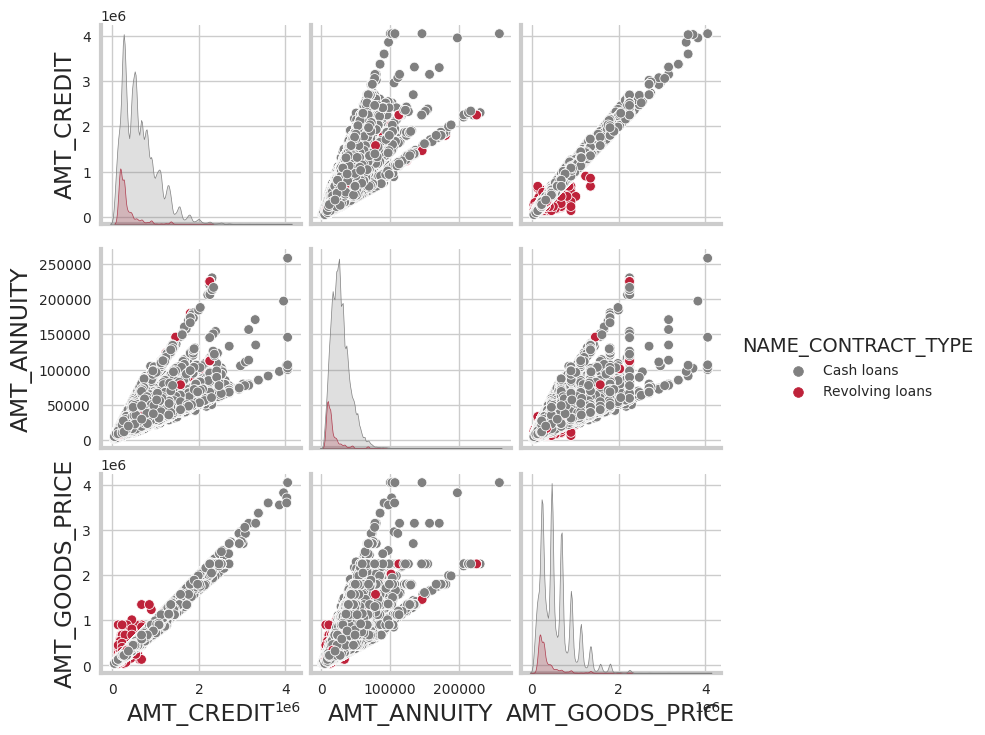

In [ ]:
sns.pairplot(data_train[['NAME_CONTRACT_TYPE','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE']],
             hue='NAME_CONTRACT_TYPE', palette = ['grey','#BE223A']);

In [ ]:
feature_final.head() 

,SK_ID_CURR,TARGET,EXT_SOURCE_2,EXT_SOURCE_3,EXT_SOURCE_1,DAYS_BIRTH,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,NAME_EDUCATION_TYPE,CODE_GENDER,DAYS_EMPLOYED,NAME_INCOME_TYPE,FLAG_DOCUMENT_3,DAYS_REGISTRATION,NAME_HOUSING_TYPE,DEF_60_CNT_SOCIAL_CIRCLE,NAME_CONTRACT_TYPE_x,AMT_CREDIT_x,TOTALAREA_MODE,AMT_INCOME_TOTAL,AMT_CREDIT_MAX_OVERDUE,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,SK_DPD_DEF_x,SK_DPD,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_INST_MIN_REGULARITY,CNT_INSTALMENT_MATURE_CUM,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS_y,NAME_CONTRACT_TYPE_y,AMT_ANNUITY,AMT_APPLICATION,DAYS_FIRST_DRAWING,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,AMT_INSTALMENT,AMT_GOODS_PRICE
0,100002,1,0.262949,0.139376,0.083037,-9461,2,2,Secondary / secondary special,M,-637,Working,1,-3648.0,House / apartment,2,Cash loans,406597.5,0.0149,202500.0,0.0,40761.0,0.0,0,0,56.970,135000,1700.325,35,XAP,Approved,Consumer loans,9251.775,179055.0,365243,125,-25,-17,9251.775,351000.0
1,100003,0,0.622246,0.535276,0.311267,-16765,1,1,Higher education,F,-1188,State servant,1,-1186.0,House / apartment,0,Cash loans,1293502.5,0.0714,270000.0,0.0,22248.0,0.0,0,0,63975.555,45000,2250.000,69,XNA,Approved,Cash loans,98356.995,900000.0,365243,-386,-536,-527,98356.995,1129500.0
2,100004,0,0.555912,0.729567,0.505998,-19046,2,2,Secondary / secondary special,M,-225,Working,0,-4260.0,House / apartment,0,Revolving loans,135000.0,0.0688,67500.0,0.0,94500.0,0.0,0,0,31815.225,450000,2250.000,30,XAP,Approved,Consumer loans,5357.250,24282.0,365243,-694,-724,-714,5357.250,135000.0
3,100006,0,0.650442,0.535276,0.505998,-19005,2,2,Secondary / secondary special,F,-3039,Working,1,-9833.0,House / apartment,0,Cash loans,312682.5,0.0688,135000.0,0.0,103950.0,0.0,0,0,236572.110,225000,11795.760,10,XNA,Approved,Cash loans,24246.000,675000.0,365243,1259,-151,-143,29027.520,297000.0
4,100007,0,0.322738,0.535276,0.505998,-19932,2,2,Secondary / secondary special,M,-3038,Working,0,-4311.0,House / apartment,0,Cash loans,513000.0,0.0688,121500.0,0.0,146250.0,0.0,0,0,453919.455,450000,22924.890,101,XNA,Approved,Cash loans,16509.600,180000.0,365243,-324,-354,-347,1834.290,513000.0


In [ ]:
feature_final.head()

,SK_ID_CURR,TARGET,EXT_SOURCE_2,EXT_SOURCE_3,EXT_SOURCE_1,DAYS_BIRTH,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,NAME_EDUCATION_TYPE,CODE_GENDER,DAYS_EMPLOYED,NAME_INCOME_TYPE,FLAG_DOCUMENT_3,DAYS_REGISTRATION,NAME_HOUSING_TYPE,DEF_60_CNT_SOCIAL_CIRCLE,NAME_CONTRACT_TYPE_x,AMT_CREDIT_x,TOTALAREA_MODE,AMT_INCOME_TOTAL,AMT_CREDIT_MAX_OVERDUE,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,SK_DPD_DEF_x,SK_DPD,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_INST_MIN_REGULARITY,CNT_INSTALMENT_MATURE_CUM,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS_y,NAME_CONTRACT_TYPE_y,AMT_ANNUITY,AMT_APPLICATION,DAYS_FIRST_DRAWING,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,AMT_INSTALMENT,AMT_GOODS_PRICE
0,100002,1,0.262949,0.139376,0.083037,-9461,2,2,Secondary / secondary special,M,-637,Working,1,-3648.0,House / apartment,2,Cash loans,406597.5,0.0149,202500.0,0.0,40761.0,0.0,0,0,56.970,135000,1700.325,35,XAP,Approved,Consumer loans,9251.775,179055.0,365243,125,-25,-17,9251.775,351000.0
1,100003,0,0.622246,0.535276,0.311267,-16765,1,1,Higher education,F,-1188,State servant,1,-1186.0,House / apartment,0,Cash loans,1293502.5,0.0714,270000.0,0.0,22248.0,0.0,0,0,63975.555,45000,2250.000,69,XNA,Approved,Cash loans,98356.995,900000.0,365243,-386,-536,-527,98356.995,1129500.0
2,100004,0,0.555912,0.729567,0.505998,-19046,2,2,Secondary / secondary special,M,-225,Working,0,-4260.0,House / apartment,0,Revolving loans,135000.0,0.0688,67500.0,0.0,94500.0,0.0,0,0,31815.225,450000,2250.000,30,XAP,Approved,Consumer loans,5357.250,24282.0,365243,-694,-724,-714,5357.250,135000.0
3,100006,0,0.650442,0.535276,0.505998,-19005,2,2,Secondary / secondary special,F,-3039,Working,1,-9833.0,House / apartment,0,Cash loans,312682.5,0.0688,135000.0,0.0,103950.0,0.0,0,0,236572.110,225000,11795.760,10,XNA,Approved,Cash loans,24246.000,675000.0,365243,1259,-151,-143,29027.520,297000.0
4,100007,0,0.322738,0.535276,0.505998,-19932,2,2,Secondary / secondary special,M,-3038,Working,0,-4311.0,House / apartment,0,Cash loans,513000.0,0.0688,121500.0,0.0,146250.0,0.0,0,0,453919.455,450000,22924.890,101,XNA,Approved,Cash loans,16509.600,180000.0,365243,-324,-354,-347,1834.290,513000.0


In [ ]:
corr1=round(feature_final.AMT_CREDIT_x.corr(feature_final.AMT_GOODS_PRICE),2)
print('Correlation of Credit amount vs Price of goods:',corr1)

Correlation of Credit amount vs Price of goods: 0.99


**Insight :** AMT_CREDIT dan AMT_GOODS_PRICE
memiliki korelasi yang kuat dengan (skor 0,99), dan memiliki
kemiringan linier positif yang masuk akal
karena sebagai harga barang yang
pinjaman yang diberikan semakin tinggi, jumlah kredit
pinjaman juga semakin tinggi.

In [ ]:
cash=feature_final[feature_final.NAME_CONTRACT_TYPE_x == 'Cash loans']
rev=feature_final[feature_final.NAME_CONTRACT_TYPE_x == 'Revolving loans']
def_cash=cash[cash.TARGET==1]
def_rev=rev[rev.TARGET==1]

Percentage of defaulted cash loan: 8.35 %
Percentage of defaulted revolving loan: 5.48 %


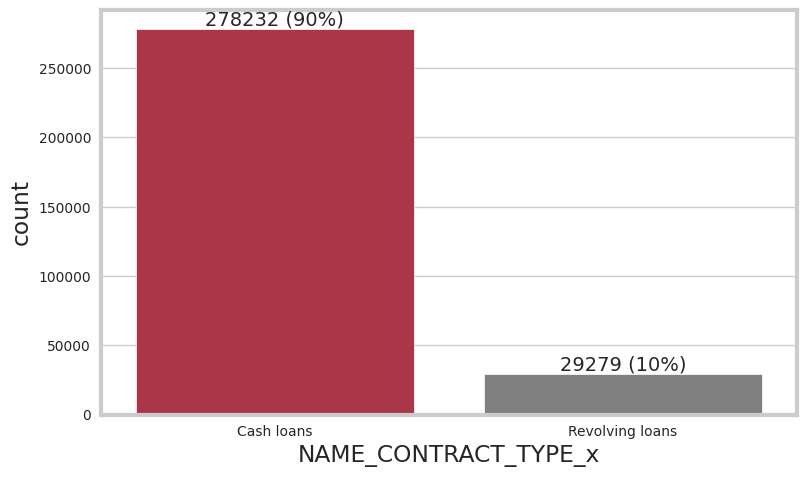

In [ ]:
print('Percentage of defaulted cash loan:',round(len(def_cash)/len(cash)*100,2,),'%')
print('Percentage of defaulted revolving loan:',round(len(def_rev)/len(rev)*100,2),'%')
clrs = ['grey' if (x < max(feature_final['TARGET'].value_counts())) else '#BE223A' for x in feature_final['TARGET'].value_counts() ]
ax = sns.countplot(data=feature_final,x='NAME_CONTRACT_TYPE_x',palette=clrs,
                   order=feature_final['NAME_CONTRACT_TYPE_x'].value_counts(ascending=False).index);
        
abs_values =feature_final['NAME_CONTRACT_TYPE_x'].value_counts(ascending=False)
rel_values =feature_final['NAME_CONTRACT_TYPE_x'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]

ax.bar_label(container=ax.containers[0], labels=lbls)

plt.show()

# **Data Encoding**

In [ ]:
stringData = feature_final.select_dtypes('object')

In [ ]:
stringData.columns

Index(['NAME_EDUCATION_TYPE', 'CODE_GENDER', 'NAME_INCOME_TYPE',
       'NAME_HOUSING_TYPE', 'NAME_CONTRACT_TYPE_x', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS_y', 'NAME_CONTRACT_TYPE_y', 'AGE_STATUS'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()

In [ ]:
feature_final['NAME_EDUCATION_TYPE']=le.fit_transform(feature_final['NAME_EDUCATION_TYPE'])
feature_final['CODE_GENDER']=le.fit_transform(feature_final['CODE_GENDER'])
feature_final['NAME_INCOME_TYPE']=le.fit_transform(feature_final['NAME_INCOME_TYPE'])
feature_final['NAME_HOUSING_TYPE']=le.fit_transform(feature_final['NAME_HOUSING_TYPE'])
feature_final['NAME_CASH_LOAN_PURPOSE']=le.fit_transform(feature_final['NAME_CASH_LOAN_PURPOSE'])
feature_final['NAME_CONTRACT_STATUS_y']=le.fit_transform(feature_final['NAME_CONTRACT_STATUS_y'])
feature_final['NAME_CONTRACT_TYPE_y']=le.fit_transform(feature_final['NAME_CONTRACT_TYPE_y'])
feature_final['NAME_CONTRACT_TYPE_x']=le.fit_transform(feature_final['NAME_CONTRACT_TYPE_x'])
feature_final['AGE_STATUS']=le.fit_transform(feature_final['AGE_STATUS'])

In [ ]:
feature_final.head( )

,SK_ID_CURR,TARGET,EXT_SOURCE_2,EXT_SOURCE_3,EXT_SOURCE_1,REGION_RATING_CLIENT_W_CITY,NAME_EDUCATION_TYPE,CODE_GENDER,NAME_INCOME_TYPE,NAME_HOUSING_TYPE,DEF_60_CNT_SOCIAL_CIRCLE,NAME_CONTRACT_TYPE_x,AMT_CREDIT_x,AMT_INCOME_TOTAL,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,SK_DPD,AMT_CREDIT_LIMIT_ACTUAL,CNT_INSTALMENT_MATURE_CUM,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS_y,NAME_CONTRACT_TYPE_y,AMT_APPLICATION,DAYS_FIRST_DRAWING,DAYS_LAST_DUE,DAYS_TERMINATION,AMT_INSTALMENT,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,FLAG_ASSET,FLAG_DOCS,FLAG_ADDR,YEARS_EMPLOYED,INCOME_BAND,EXP_CAR,EXP_HOUSE,AGE,AGE_STATUS,INCOME_BINS,AMT_CREDIT_SUM_DEBT_BINS
0,100002,1,0.262949,0.139376,0.083037,2,4,1,7,1,2,0,406597.5,202500.0,40761.0,0.0,0,135000,35,23,0,1,179055.0,365243,-25,-17,9251.775,351000.0,0.018801,1,6,2,1,0,2,7,0,2.0207,25.920548,2,7,-1
1,100003,0,0.622246,0.535276,0.311267,1,1,0,4,1,0,0,1293502.5,270000.0,22248.0,0.0,0,45000,69,24,0,0,900000.0,365243,-536,-527,98356.995,1129500.0,0.003541,2,40,0,1,0,3,8,0,2.8790,45.931507,1,8,-1
2,100004,0,0.555912,0.729567,0.505998,2,4,1,7,1,0,1,135000.0,67500.0,94500.0,0.0,0,450000,30,23,0,1,24282.0,365243,-724,-714,5357.250,135000.0,0.010032,1,12,3,0,0,1,3,7,0.0000,52.180822,1,3,-1
3,100006,0,0.650442,0.535276,0.505998,2,4,0,7,1,0,0,312682.5,135000.0,103950.0,0.0,0,225000,10,24,0,0,675000.0,365243,-151,-143,29027.520,297000.0,0.008019,2,6,2,1,0,8,5,0,0.0000,52.068493,1,5,-1
4,100007,0,0.322738,0.535276,0.505998,2,4,1,7,1,0,0,513000.0,121500.0,146250.0,0.0,0,450000,101,24,0,0,180000.0,365243,-354,-347,1834.290,513000.0,0.028663,1,38,2,1,1,8,4,0,0.0000,54.608219,1,4,-1


In [ ]:
feature_final.shape

(307511, 42)

Feature yang sudah bersih dan sudah diubah ke numerikal, tinggal dilanjutkan ke tahap modeling

# **Memisahkan Variabel Dependen dan Independen**

In [ ]:
X = feature_final.drop(['TARGET'], axis=1)
y = feature_final['TARGET']

# **Scaling the Data**

Lakukan scaling pada x!

In [ ]:
from sklearn import preprocessing

In [ ]:
X = preprocessing.scale(X)

#**Splitting**


- Training set: 60% dari dataset awal (X_train, y_train)
- Validation set: 20% dari dataset awal (X_val, y_val)
- Test set: 20% dari dataset awal (X_test, y_test)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Memisahkan dataset menjadi training set dan sisa dataset (validation + test set)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Memisahkan sisa dataset menjadi validation set dan test set
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)



In [ ]:
# Cetak jumlah sampel di masing-masing subset
print("Jumlah sampel dalam training set:", len(X_train))
print("Jumlah sampel dalam validation set:", len(X_val))
print("Jumlah sampel dalam test set:", len(X_test))# Cetak jumlah sampel di masing-masing subset
print("Jumlah sampel dalam training set:", len(X_train))
print("Jumlah sampel dalam validation set:", len(X_val))
print("Jumlah sampel dalam test set:", len(X_test))

Jumlah sampel dalam training set: 184506
Jumlah sampel dalam validation set: 61502
Jumlah sampel dalam test set: 61503
Jumlah sampel dalam training set: 184506
Jumlah sampel dalam validation set: 61502
Jumlah sampel dalam test set: 61503


#**Baseline Model**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

##**Random Forest**

In [ ]:
model_rf = RandomForestClassifier()

In [ ]:
model_rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
model_rf_pred = model_rf.predict(X_test)

In [ ]:
# Evaluasi kinerja Logistic Regression dengan data uji
accuracy_rf = accuracy_score(y_test, model_rf_pred)*100
accuracies['Random Forest'] = accuracy_rf
print(f"Random Forest accuracy score: {accuracy_rf:.2f}%")

Random Forest accuracy score: 91.96%


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, roc_curve
# Show the classification report
y_true = y_test
print(classification_report(y_true, model_rf_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56554
           1       0.64      0.00      0.01      4949

    accuracy                           0.92     61503
   macro avg       0.78      0.50      0.48     61503
weighted avg       0.90      0.92      0.88     61503



##**Decision tree**

In [ ]:
model_dt = DecisionTreeClassifier()

In [ ]:
model_dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
model_pred = model_dt.predict(X_test)

In [ ]:
accuracy_dtt = accuracy_score(y_test, model_pred) * 100
accuracies['Decision Tree'] = accuracy_dtt
print(f"Decision Tree Accuracy Score: {accuracy_dtt:.2f}%")

Decision Tree Accuracy Score: 85.29%


In [ ]:
# Show the classification report
y_true = y_test
print(classification_report(y_true, model_pred))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92     56554
           1       0.14      0.17      0.15      4949

    accuracy                           0.85     61503
   macro avg       0.53      0.54      0.54     61503
weighted avg       0.86      0.85      0.86     61503



##**Gradient Boosting**

In [ ]:
model_gb = GradientBoostingClassifier()
model_gb.fit(X_train, y_train)
model_gb_pred = model_gb.predict(X_test) 

In [ ]:
# Show the classification report
y_true = y_test
print(classification_report(y_true, model_gb_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56554
           1       0.50      0.01      0.02      4949

    accuracy                           0.92     61503
   macro avg       0.71      0.51      0.49     61503
weighted avg       0.89      0.92      0.88     61503



## **LGB**

In [ ]:
import time
import lightgbm as lgb
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold

In [ ]:
# Membuat objek model LGBMClassifier
model_lgb = lgb.LGBMClassifier()

# Melatih model menggunakan data latih
model_lgb.fit(X_train, y_train)

# Memprediksi nilai target untuk data uji
y_pred_lgb= model_lgb.predict(X_test)

# Menghitung akurasi prediksi
accuracy = accuracy_score(y_test, y_pred_lgb)

In [ ]:
# Show the classification report
y_true = y_test
print(classification_report(y_true, y_pred_lgb))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56554
           1       0.51      0.01      0.02      4949

    accuracy                           0.92     61503
   macro avg       0.71      0.51      0.49     61503
weighted avg       0.89      0.92      0.88     61503



# Modeling Data Imbalance

In [ ]:
def get_score(y_pred_list, y_test, average=None, plot=True, axis=0, cmap='Blues'):
    model_name = []
    accuracy = []
    precision = []
    recall = []
    f1 = []
    
    for name, y_pred in y_pred_list.items():
        model_name.append(name)
        if average != None:
            accuracy.append(accuracy_score(y_test, y_pred))
            precision.append(precision_score(y_test, y_pred, average=average))
            recall.append(recall_score(y_test, y_pred, average=average))
            f1.append(f1_score(y_test, y_pred, average=average))
            

            score_list = {
                'model':model_name,
                'accuracy':accuracy,
                f'{average}_avg_precision':precision,
                f'{average}_avg_recall':recall,
                f'{average}_avg_f1_score':f1,
                }
        else:
            accuracy.append(accuracy_score(y_test, y_pred))
            precision.append(precision_score(y_test, y_pred))
            recall.append(recall_score(y_test, y_pred))
            f1.append(f1_score(y_test, y_pred))
            

            score_list = {
                'model':model_name,
                'accuracy':accuracy,
                'precision':precision,
                'recall':recall,
                'f1_score':f1,
                }

    score_df = pd.DataFrame(score_list).set_index('model')
    
    if plot:
        display(score_df.style.background_gradient(axis=axis, cmap=cmap))

    return score_df

In [ ]:
#Execute five classification model
model_list = {
    'Gradient Boosting Classifier':GradientBoostingClassifier(),
    'Random Forest Classifier':RandomForestClassifier(),
    'LightGBM':LGBMClassifier(),
    'Decission Tree': DecisionTreeClassifier()
}

In [ ]:
y_pred_list = dict()

for name, model in model_list.items():
    model.fit(X_train, y_train)
    y_pred_list[name] = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score
score_pure = get_score(y_pred_list, y_test, average='macro')

,accuracy,macro_avg_precision,macro_avg_recall,macro_avg_f1_score
model,,,,
Gradient Boosting Classifier,0.919549,0.712197,0.505817,0.491438
Random Forest Classifier,0.919565,0.726543,0.501493,0.482256
LightGBM,0.919727,0.736520,0.505914,0.491514
Decission Tree,0.853259,0.534301,0.539006,0.536247


# Training with balance data

<Axes: ylabel='TARGET'>

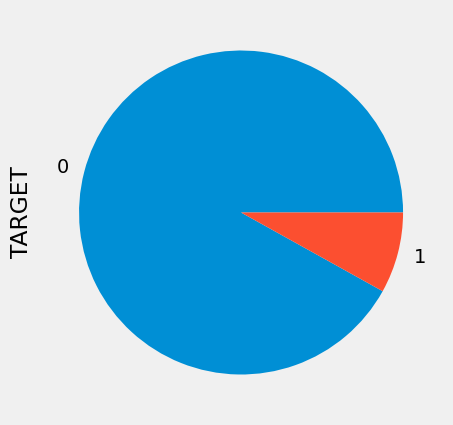

In [ ]:
total_loans = feature_final['TARGET'].value_counts()
total_loans.plot(kind='pie')

<Axes: ylabel='TARGET'>

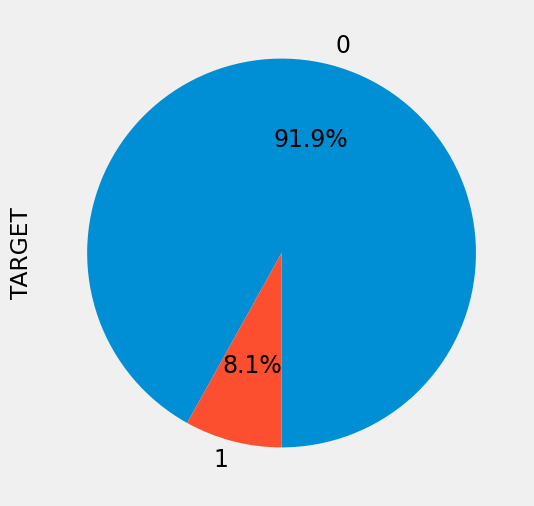

In [ ]:
fig = plt.figure(figsize=(6,6))
ax = plt.subplot(111)

total_loans.plot(kind='pie', ax=ax, autopct='%1.1f%%', startangle=270, fontsize=17)

Distribusi data tasrget tidak seimbang, yang artinya data tersebut harus di seimbangkan. 

Di bagian ini, kami melakukan praproses data dengan pengodean, penyeimbangan, dan penskalaan. Kami menggunakan LabelEncoder karena Catboost akan bekerja efektif dengan kolom kategorikal, jadi kami memutuskan untuk tidak menggunakan One Hot Encoding. Kemudian, kami menyeimbangkan data dengan KMeansSmotr yang memberikan akurasi terbaik

In [ ]:
# over sampling
from imblearn.over_sampling import SMOTEN

In [ ]:
# As there is imbalance in the classes so to overcome this issue using oversampling through KMeansSMOTE to generate synthetic samples
cc = SMOTEN(random_state = 42)
X_smote, y_smote = cc.fit_resample(X, y)

# Randomly pick a point from the minority class.
# Compute the k-nearest neighbors (for some pre-specified k) for this point.
# Add k new points somewhere between the chosen point and each of its neighbors

#Splitting the data
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, y_smote, test_size=0.2, random_state=1, stratify=y_smote)

In [ ]:
#After oversampling
unique_values, counts = np.unique(y_smote, return_counts=True)

# Menampilkan nilai unik dan frekuensinya
for value, count in zip(unique_values, counts):
    print("Nilai:", value, "- Jumlah:", count)

Nilai: 0 - Jumlah: 282686
Nilai: 1 - Jumlah: 282686


<Axes: ylabel='TARGET'>

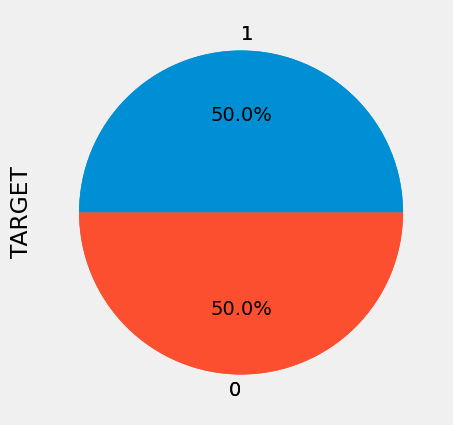

In [ ]:
# Mengubah array numpy menjadi objek pandas Series
y_smote_series = pd.Series(y_smote) # Karena y_smote harus berupa array maka harus di konversi dengan pd.series
# Menghitung jumlah kemunculan nilai-nilai dalam Series
after_os = y_smote_series.value_counts()
percentage = after_os / len(y_smote_series) * 100

fig, ax = plt.subplots()
ax.pie(after_os, labels=after_os.index, autopct='%1.1f%%')
# Membuat plot diagram pie
percentage.plot(kind='pie')

# Modeling Data Balance

In [ ]:
y_pred_list = dict()

for name, model in model_list.items():
    model.fit(X_train_smote, y_train_smote)
    y_pred_list[name] = model.predict(X_test_smote)

In [ ]:
score = get_score(y_pred_list, y_test_smote)

,accuracy,precision,recall,f1_score
model,,,,
Gradient Boosting Classifier,0.945594,0.972398,0.917224,0.944006
Random Forest Classifier,0.954314,0.996559,0.911776,0.952284
LightGBM,0.951705,0.986995,0.915473,0.949889
Decission Tree,0.915897,0.907946,0.925643,0.916709


# Model Tuning 

## Random Forest

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, 
                                            stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [ ]:
rf = RandomForestClassifier(n_estimators = 1000,
min_samples_split = 2,
min_samples_leaf = 1,
max_features = 'sqrt',
max_depth = 110,
bootstrap = True)
rf.fit(X_train_smote, y_train_smote)
y_pred_smote = rf.predict(X_test_smote)

In [ ]:
from sklearn.metrics import f1_score
print(classification_report(y_pred_smote,y_test_smote))

              precision    recall  f1-score   support

           0       0.91      0.88      0.89       104
           1       0.87      0.91      0.89        97

    accuracy                           0.89       201
   macro avg       0.89      0.89      0.89       201
weighted avg       0.89      0.89      0.89       201



## LightGBM

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# Buat samplel data
X, y = make_classification(n_samples=1000, 
                           n_features=10, random_state=42)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define parameter grid for hyperparameter tuning
param_grid = {
    'num_leaves': [10, 20, 30, 40, 50],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'max_depth': [3, 4, 5, 6, -1],
    'n_estimators': [100, 200, 300, 400, 500],
    'min_child_samples': [10, 20, 30, 40, 50],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0]
}

# Perform randomized search cross-validation
randomized_search = RandomizedSearchCV(estimator=model_lgb, param_distributions=param_grid, 
                                       n_iter=10, cv=5, random_state=42)
randomized_search.fit(X_train, y_train)

# Print best parameters and best score
print("Best parameters found: ", randomized_search.best_params_)
print("Best score: ", randomized_search.best_score_)

# Evaluate the model on the test set
best_model = randomized_search.best_estimator_
y_pred_lgbm = best_model.predict(X_test)

Best parameters found:  {'subsample': 0.9, 'num_leaves': 20, 'n_estimators': 200, 'min_child_samples': 10, 'max_depth': 4, 'learning_rate': 0.01, 'colsample_bytree': 0.9}
Best score:  0.91375


In [ ]:
from sklearn.metrics import f1_score

# Calculate evaluation metrics
precision = precision_score(y_test, y_pred_lgbm)
recall = recall_score(y_test, y_pred_lgbm)
f1 = f1_score(y_test, y_pred_lgbm)

print(classification_report(y_pred_lgbm,y_test))


              precision    recall  f1-score   support

           0       0.93      0.85      0.89        98
           1       0.86      0.94      0.90       102

    accuracy                           0.90       200
   macro avg       0.90      0.89      0.89       200
weighted avg       0.90      0.90      0.89       200



# Model Evaluasi - Confusion Matrix

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score


In [ ]:
lgb_cm = confusion_matrix(y_test, y_pred_lgb, labels=np.unique(y_test))

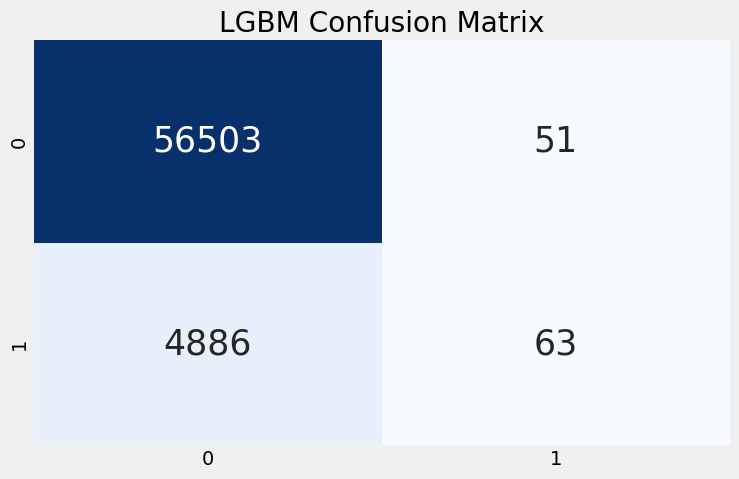

In [ ]:
# plt.figure(figsize=(24,12))

# plt.suptitle("Confusion Matrixes",fontsize=30)
# plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

# plt.subplot(2,3,1)
# plt.title("Random Forest Confusion Matrix")
# sns.heatmap(rf_cm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 25}) 

# plt.subplot(2,3,2)
# plt.title("Decision Tree Confusion Matrix")
# sns.heatmap(dt_cm, annot=True, cmap="Blues", fmt="d", cbar=False, annot_kws={"size":25})

# plt.subplot(2,3,3)
# plt.title("Gradient Boosting Confusion Matrix")
# sns.heatmap(gb_cm, annot=True, cmap="Blues", fmt="d", cbar=False, annot_kws={"size":25})

# plt.subplot(2,3,4)
plt.title("LGBM Confusion Matrix")
sns.heatmap(lgb_cm, annot=True, cmap='Blues', fmt='d', cbar=False, annot_kws={'size':25})

plt.show()

Dalam kasus ini, kita memiliki confusion matrix dengan dua kelas, yaitu "Sanggup Bayar" (0) dan "Tidak Sanggup Bayar" (1) untuk kasus Home Credit.

Berikut adalah penjelasan dari confusion matrix ini:

1. True Positives (TP): Angka 56503 pada posisi (0,0) menunjukkan jumlah pengamatan yang benar diklasifikasikan sebagai "Sanggup Bayar" oleh model.
2. False Positives (FP): Angka 51 pada posisi (0,1) menunjukkan jumlah pengamatan yang sebenarnya termasuk dalam kelas "Tidak Sanggup Bayar", tetapi salah diklasifikasikan oleh model sebagai "Sanggup Bayar".
3. False Negatives (FN): Angka 4886 pada posisi (1,0) menunjukkan jumlah pengamatan yang sebenarnya termasuk dalam kelas "Sanggup Bayar", tetapi salah diklasifikasikan oleh model sebagai "Tidak Sanggup Bayar".
4. True Negatives (TN): Angka 63 pada posisi (1,1) menunjukkan jumlah pengamatan yang benar diklasifikasikan sebagai "Tidak Sanggup Bayar" oleh model.

Dalam konteks Home Credit, kita tertarik untuk mengidentifikasi dengan benar apakah seseorang sanggup atau tidak sanggup membayar. Dalam hal ini, kita akan fokus pada kelas "Tidak Sanggup Bayar" (1) sebagai kelas yang lebih penting untuk diidentifikasi secara akurat. Oleh karena itu, metrik evaluasi yang penting dalam kasus ini adalah:
1. Sensitivity (Recall): Sensitivitas atau recall adalah rasio antara jumlah prediksi benar positif (TP) dengan total jumlah yang sebenarnya positif (TP + FN). Ini memberikan informasi tentang seberapa baik model dalam mengidentifikasi orang-orang yang tidak sanggup membayar. Semakin tinggi sensitivitas, semakin baik model dalam mengklasifikasikan orang-orang yang benar-benar tidak sanggup membayar.
2. Specificity: Spesifisitas adalah rasio antara jumlah prediksi benar negatif (TN) dengan total jumlah yang sebenarnya negatif (TN + FP). Ini memberikan informasi tentang seberapa baik model dalam mengidentifikasi orang-orang yang sanggup membayar.

# ROC - AUC Curve

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Membuat dataset sintetis untuk contoh
X, y = make_classification(n_samples=1000, 
                           n_features=10, random_state=42)

# Membagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Define Metrics Decision Tree
# Memilih subset fitur yang sesuai dengan model DecisionTreeClassifier
X_train_subset = X_train[:, :10]  # Mengambil 10 fitur pertama
# Melatih model DecisionTreeClassifier dengan subset fitur
model_dt.fit(X_train_subset, y_train)
# Menggunakan subset fitur untuk data uji
X_test_subset = X_test[:, :10]  # Mengambil 10 fitur pertama
# Menghitung probabilitas prediksi untuk kelas positif
proba_dt = model_dt.predict_proba(X_test_subset)[:, 1]

# Menghitung FPR, TPR, dan AUC
fpr_dt, tpr_dt, _ = metrics.roc_curve(y_test, proba_dt)
auc_dt = metrics.roc_auc_score(y_test, proba_dt)


In [ ]:
# Define metrics Random Forest 
# Melatih Model Random Forest
model_rf.fit(X_train_subset, y_train)
# Menghitung probabilitas prediksi untuk kelas positif
proba_rf = model_rf.predict_proba(X_test_subset)[:, 1]

# Menghitung FPR, TPR, dan AUC
fpr_rf, tpr_rf, _ = metrics.roc_curve(y_test, proba_rf)
auc_rf = metrics.roc_auc_score(y_test, proba_rf)

In [ ]:
# Define metrics Gradeint Boosting 
# Melatih Model Gradien Boosting
model_gb.fit(X_train_subset, y_train)
# Menghitung probabilitas prediksi untuk kelas positif
proba_gb = model_gb.predict_proba(X_test_subset)[:, 1]

# Menghitung FPR, TPR, dan AUC
fpr_gb, tpr_gb, _ = metrics.roc_curve(y_test, proba_gb)
auc_gb = metrics.roc_auc_score(y_test, proba_gb)

In [ ]:
# Define metrics LGBM 
model_lgb.fit(X_train_subset, y_train)
proba_lgbm = model_lgb.predict_proba(X_test_subset)[:, 1]
fpr_lgbm, tpr_lgbm, _ = metrics.roc_curve(y_test, proba_lgbm)
auc_lgbm = metrics.roc_auc_score(y_test, proba_lgbm)

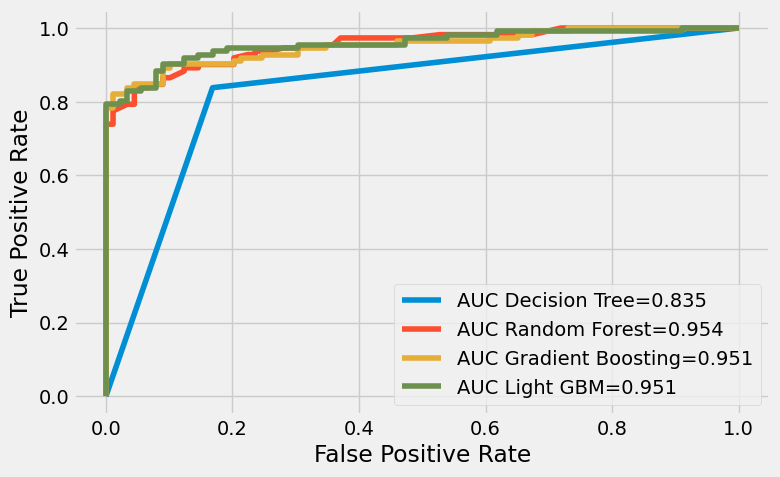

In [ ]:
#create ROC curve and Value of AUC
plt.plot(fpr_dt, tpr_dt, label="AUC Decision Tree="+str(f"{auc_dt:.3f}"))
plt.plot(fpr_rf, tpr_rf, label="AUC Random Forest=" +str(f"{auc_rf:.3f}"))
plt.plot(fpr_gb, tpr_gb, label="AUC Gradient Boosting=" +str(f"{auc_gb:.3f}"))
plt.plot(fpr_lgbm, tpr_lgbm, label="AUC Light GBM=" +str(f"{auc_gb:.3f}"))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix

def find_rates_for_thresholds(y_test, y_pred, thresholds):
    fpr_list = []
    tpr_list = []
    for threshold in thresholds:
        y_pred_binary = (y_pred > threshold).astype(int)
        tn, fp, fn, tp = confusion_matrix(y_test, y_pred_binary).ravel()
        fpr = fp / (fp + tn)
        tpr = tp / (tp + fn)
        fpr_list.append(fpr)
        tpr_list.append(tpr)
    return fpr_list, tpr_list

thresholds = np.arange(0, 1.1, 0.1)


# fpr_rf, tpr_rf = find_rates_for_thresholds(y_test, proba_rf, thresholds)
fpr_gbm, tpr_gbm = find_rates_for_thresholds(y_test, proba_lgbm, thresholds)
fpr_gb, tpr_gb = find_rates_for_thresholds(y_test, proba_gb, thresholds)


summary_df = pd.DataFrame({
    'Threshold': thresholds,
    # 'FPR_RF': fpr_rf, 
    # 'TPR_RF': tpr_rf,
    'FPR_Light GBM': fpr_gbm,  
    'TPR_Light GBM' : tpr_gbm,
    'FPR_GB' : fpr_gb,
    'TPR_GB' : tpr_gb,

})

print(summary_df)


    Threshold  FPR_Light GBM  TPR_Light GBM    FPR_GB    TPR_GB
0         0.0       1.000000       1.000000  1.000000  1.000000
1         0.1       0.168539       0.927928  0.292135  0.927928
2         0.2       0.123596       0.909910  0.202247  0.909910
3         0.3       0.089888       0.891892  0.123596  0.900901
4         0.4       0.078652       0.882883  0.101124  0.900901
5         0.5       0.078652       0.846847  0.056180  0.846847
6         0.6       0.067416       0.837838  0.033708  0.828829
7         0.7       0.044944       0.828829  0.011236  0.810811
8         0.8       0.022472       0.801802  0.000000  0.738739
9         0.9       0.022472       0.792793  0.000000  0.684685
10        1.0       0.000000       0.000000  0.000000  0.000000


In [ ]:
def find_best_threshold(y_test, y_pred):
    # based on Youden's Index
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    optimal_idx = np.argmax(tpr - fpr)
    return thresholds[optimal_idx]

# best_threshold_logreg = find_best_threshold(y_test, y_pred_logreg)
# best_threshold_rf = find_best_threshold(y_test, proba_rf)
best_threshold_lgbm = find_best_threshold(y_test, proba_lgbm)
best_threshold_gb = find_best_threshold(y_test, proba_gb)
 
# print(f"Best threshold for Random Forest: {best_threshold_rf}")
print(f"Best threshold for Gradient Boosting: {best_threshold_gb}")
print(f"Best threshold for Light GBM: {best_threshold_lgbm}")

Best threshold for Gradient Boosting: 0.684135978573237
Best threshold for Light GBM: 0.25421963960863675


# Feature Importance

In [ ]:
# Sebelum mengecek feature importance, kami melakukan drop pada fitur SK_ID_CURR dan TARGET dikaernakan fitur ini merupakan tujuan dari setiap fitur 
feature_final.drop(columns=['SK_ID_CURR', 'TARGET'], inplace=True)

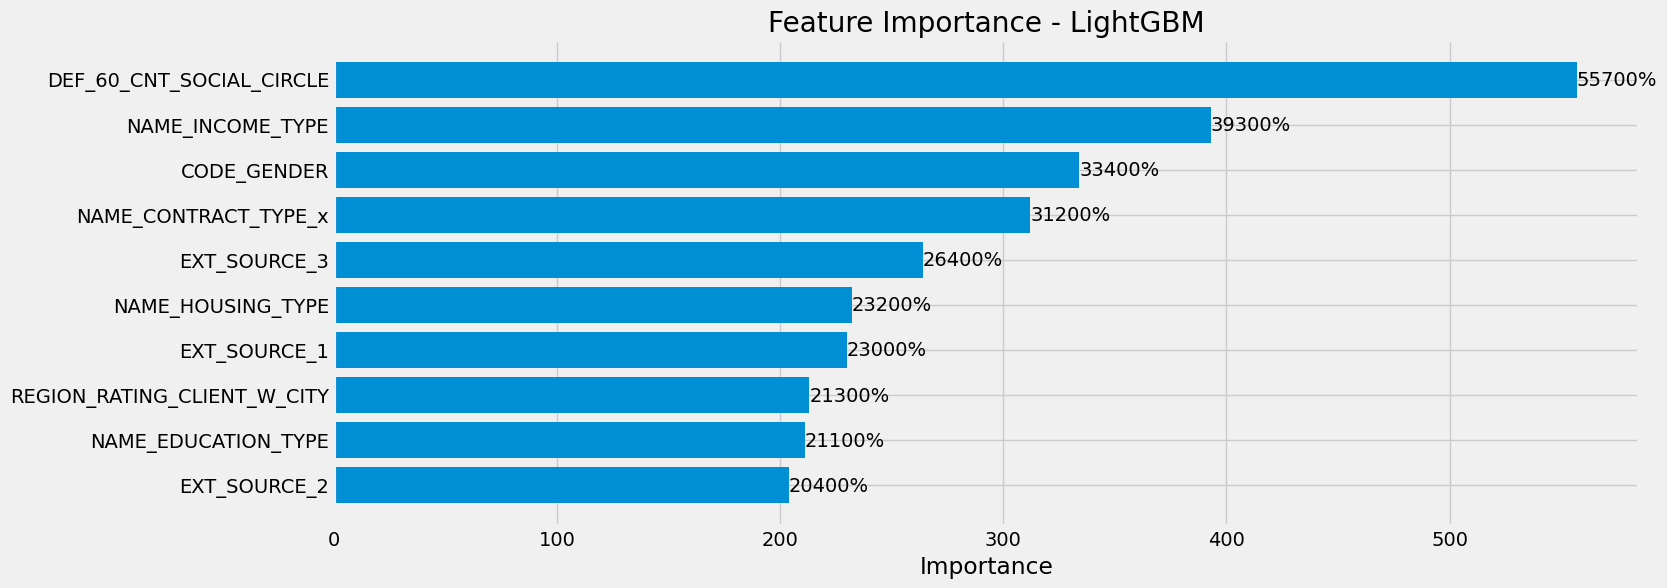

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Mengambil nama fitur dari sumber data asli
importances = model_lgb.feature_importances_
indices = np.argsort(importances)

feature_names = list(feature_final.columns) 


# Membuat plot bar horizontal
plt.figure(figsize=(15, 6))
plt.title("Feature Importance - LightGBM")
plt.barh(range(X_train.shape[1]), importances[indices], align="center")
# Menambahkan label pada setiap bar yang menampilkan persentase
for i, v in enumerate(importances[indices][:42]):
    plt.text(v, i, f"{round(v*100, 2)}%", va='center')
plt.yticks(range(X_train.shape[1]), [feature_names[i] for i in indices])
plt.xlabel("Importance")
plt.show()


In [ ]:
# pd.DataFrame({'Information Value': ['< 0.02', '0.02 - 0.1', '0.1 - 0.3', '0.3 - 0.5', '> 0.5'],
# 'Variable Predictiveness' : ['Not useful for prediction','Weak predictive power','Medium Predictive Power','Strong predictive power','suspicious predictive power']})

# Predict to Actual

In [ ]:
import pandas as pd

# Assuming you have the predicted values stored in y_pred_lgb and the actual values in y_test

# Create a DataFrame with predicted and actual values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_lgb})

# Print the DataFrame
print(df)



     Actual  Predicted
0         0          0
1         1          0
2         1          0
3         1          0
4         0          0
..      ...        ...
195       0          0
196       0          0
197       1          0
198       1          0
199       1          0

[200 rows x 2 columns]


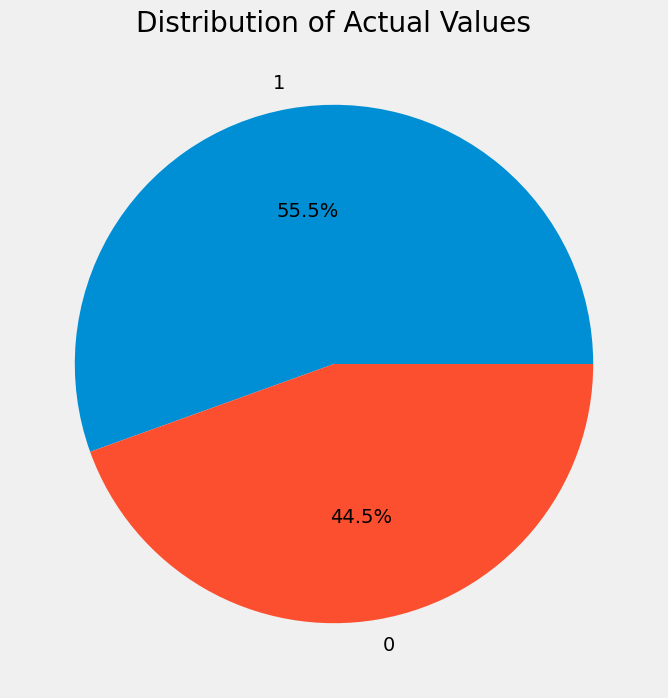

In [ ]:
import matplotlib.pyplot as plt

# Hitung jumlah masing-masing nilai aktual
actual_counts = df['Actual'].value_counts()

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(actual_counts, labels=actual_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Actual Values')
plt.show()
